<a href="https://colab.research.google.com/github/Pkolekar940/Bike-sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike sharing Demand Sharing



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member  -** Pramod Kolekar

# **Project Summary -**

###There are rental bikes in cities to make it easier for people to get around. It's important to have enough bikes available when people need them, so they don't have to wait. But figuring out how many bikes are needed at different times is a challenge. We need to predict how many bikes will be needed each hour to make sure there are always enough for everyone.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#  Let's Loading Dataset and Importing Modules

In [1]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



# **GitHub Link -**

https://bit.ly/3J0xHxS

# **Problem Statement**


In [2]:
# Let's import our dataset
import pandas as pd

url = 'https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_csv(url, encoding='latin1')


# **Understand More About The Data**

In [3]:
# Let's View the data of random rows to take a glimps of the data
data.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3720  05/05/2018                796     0             12.2           59   
1317  24/01/2018                132    21            -14.7           40   
7970  29/10/2018                184     2              4.7           81   
4766  17/06/2018               1709    14             26.8           44   
1633  07/02/2018                 96     1            -12.3           47   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3720               1.2              1718                        4.4   
1317               3.2              1933                      -25.3   
7970               1.0              1918                        1.7   
4766               1.6               760                       13.5   
1633               1.9              1837                      -21.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3720                     0.00           0.0            0.0  Spring   
1317                     0.00           0.0            0.7  Winter   
7970                     0.00           0.0            0.0  Autumn   
4766                     2.01           0.0            0.0  Summer   
1633                     0.00           0.0            0.0  Winter   

         Holiday Functioning Day  
3720  No Holiday             Yes  
1317  No Holiday             Yes  
7970  No Holiday             Yes  
4766  No Holiday             Yes  
1633  No Holiday             Yes

In [4]:
# Let's check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
# Let's generate descriptive statistics of a dataset
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [6]:
#Getting the shape of dataset with rows and columns
print(data.shape)

(8760, 14)


##Missing values

In [7]:
#check for count of missing values in each column.
data.isna().sum()
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

In [8]:
# let's check is there any ducplicate value present in our data or not
data.duplicated().sum()

0

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

In [9]:
# Rename the complex columns name
data=data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [10]:
# creating new dataframe in order to apply some staticle
num_dat=data[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall']]

In [11]:
# Let's check the correlation between Rented Bike Count and other features
data.corr()['Rented_Bike_Count']

Rented_Bike_Count        1.000000
Hour                     0.410257
Temperature              0.538558
Humidity                -0.199780
Wind_speed               0.121108
Visibility               0.199280
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Name: Rented_Bike_Count, dtype: float64

We can clearly see here Hour, Tempreature, Dew point tempreature and Solar Radiation highly correlated with Rented Bike Count

In [12]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

## Converting to datetime datatype

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***





In [13]:
# Let's Converting to datetime datatype
data['Date']=pd.to_datetime(data['Date'])

In [14]:
# Let's extract year from the date module
data['date_year']=data['Date'].dt.year

# Let's extract Months from the date module
data['date_months']=data['Date'].dt.month

# Let's extract Day from the date module
data['date_day']=data['Date'].dt.day_name()


In [15]:
# Let's find value count of date year
data['date_year'].value_counts()

2018    8016
2017     744
Name: date_year, dtype: int64

In [16]:
# Create a new column 'weekdays_weekend' based on 'Date'

data['weekdays_weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['weekdays_weekend'] = data['weekdays_weekend'].apply(lambda x: 0 if x in ['Saturday', 'Sunday'] else 1 )


In [17]:
# Let's see the value
data['weekdays_weekend'].value_counts()

1    6216
0    2544
Name: weekdays_weekend, dtype: int64

In [18]:
# Let's see random record of our dataset using sample method.
data.sample(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5255 2018-07-07               1416    23         21.7        51         1.7   
3536 2018-04-27               1922     8         11.6        58         1.4   
7974 2018-10-29                436     6          4.7        76         0.6   
4656 2018-06-13               1274     0         19.3        76         1.2   
6757 2018-08-09               1505    13         26.1        32         3.0   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
5255        2000                   11.1             0.00       0.0       0.0   
3536        1150                    3.6             0.79       0.0       0.0   
7974        2000                    0.8             0.00       0.0       0.0   
4656        1968                   14.9             0.00       0.0       0.0   
6757        1985                    8.1             3.06       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months   date_day  \
5255  Summer  No Holiday             Yes       2018            7   Saturday   
3536  Spring  No Holiday             Yes       2018            4     Friday   
7974  Autumn  No Holiday             Yes       2018           10     Monday   
4656  Summer  No Holiday             Yes       2018            6  Wednesday   
6757  Autumn  No Holiday             Yes       2018            8   Thursday   

      weekdays_weekend  
5255                 0  
3536                 1  
7974                 1  
4656                 1  
6757                 1

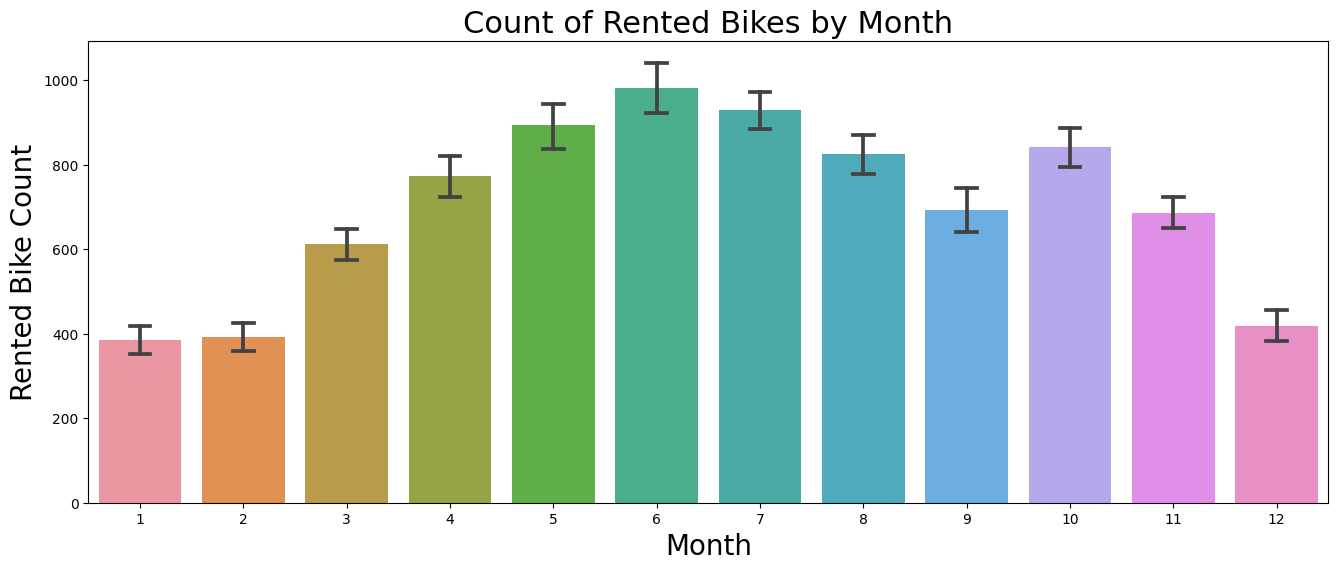

In [19]:
# Let's plot barchart Rented Bike Count VS Months.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_months', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by Month', fontsize=22)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


* From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

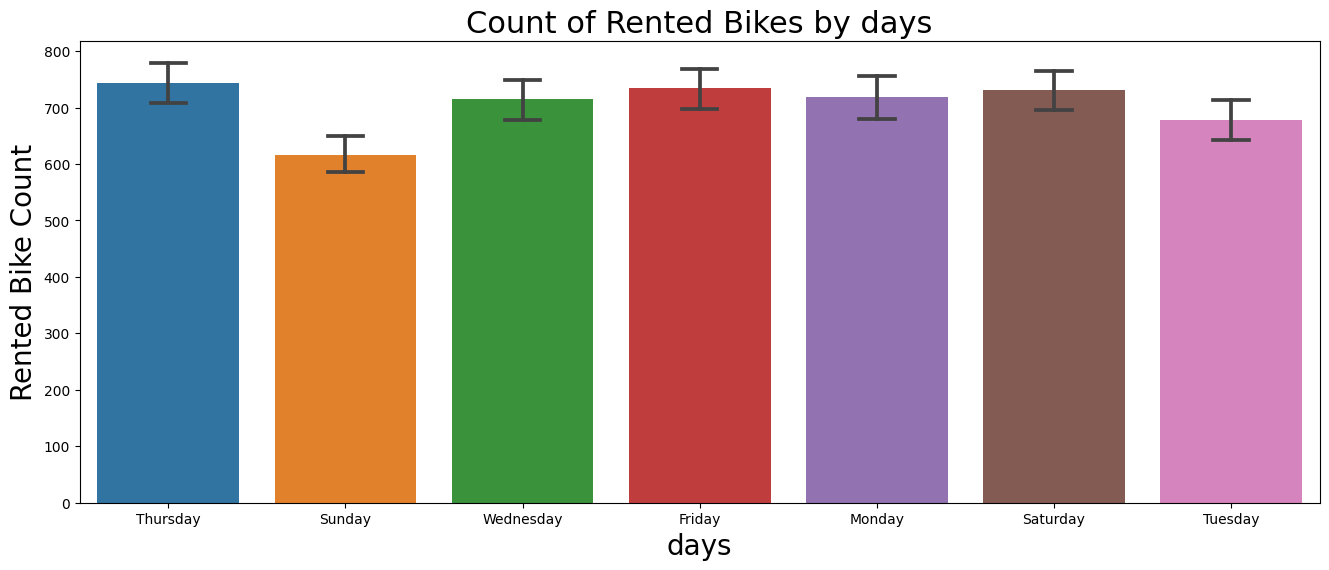

In [20]:
# Let's plot barchart Rented Bike Count VS Days.

fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=data, x='date_day', y='Rented_Bike_Count', ax=ax, capsize=.2)
ax.set_title('Count of Rented Bikes by days', fontsize=22)
ax.set_xlabel('days', fontsize=20)
ax.set_ylabel('Rented Bike Count', fontsize=20)

plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

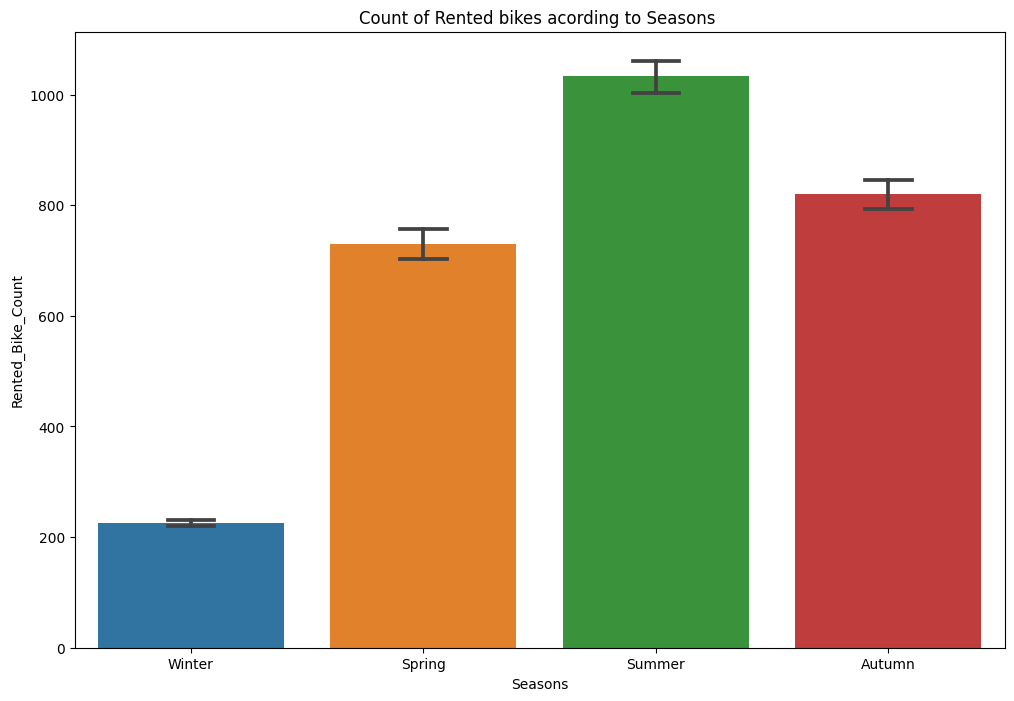

In [21]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

We can see here in Count of Rented bikes acording to Seasons chart in summer seasons it's more than 1000 rented bikes count

In [22]:
# Let's define the temperature bins
bins = [-20, -10, 0, 10, 20, 30, 40]

# Create a new column 'Temperature_Bins' in the DataFrame
data['Temperature_Bins'] = pd.cut(data['Temperature'], bins)

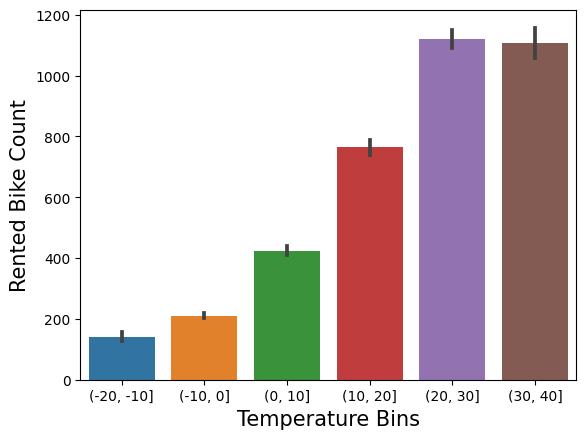

In [23]:
# Let's plot a bar chart to see graph Rented Bike Count vs Temperature
sns.barplot(x=data['Temperature_Bins'], y=data['Rented_Bike_Count'])

# Set the axis labels
plt.xlabel('Temperature Bins' , fontsize=15)
plt.ylabel('Rented Bike Count', fontsize=15)

# Display the plot
plt.show()


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

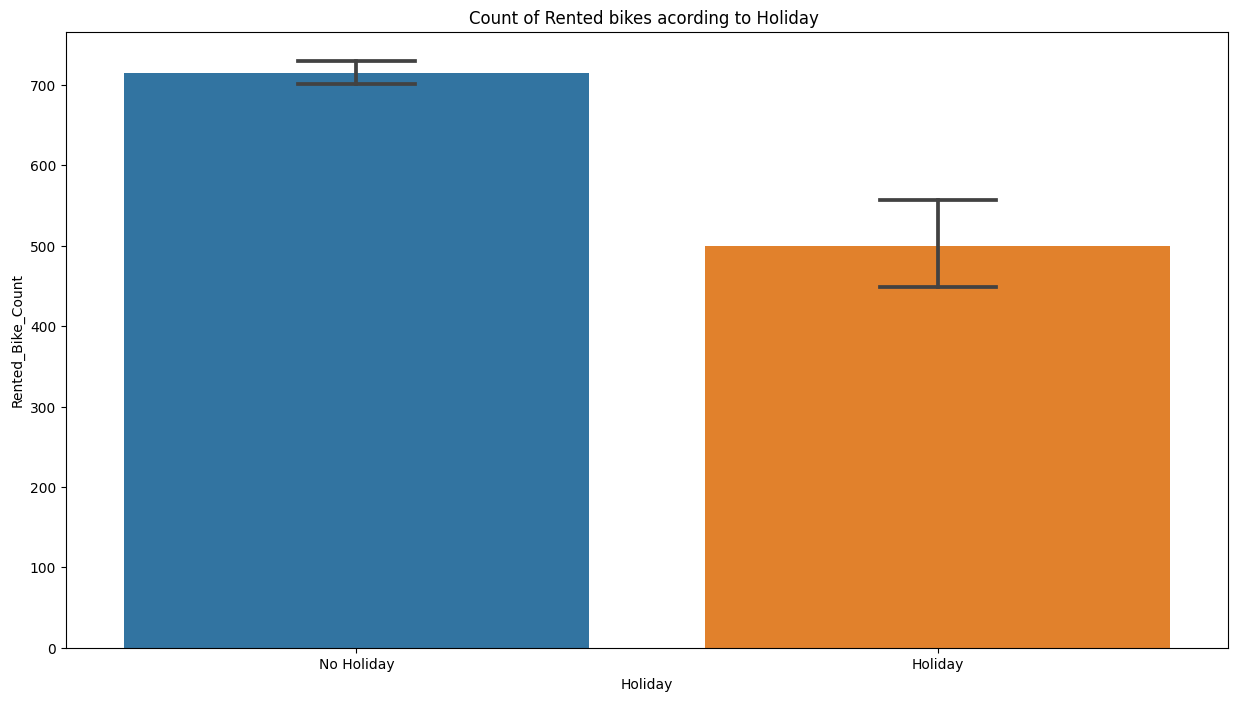

In [24]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

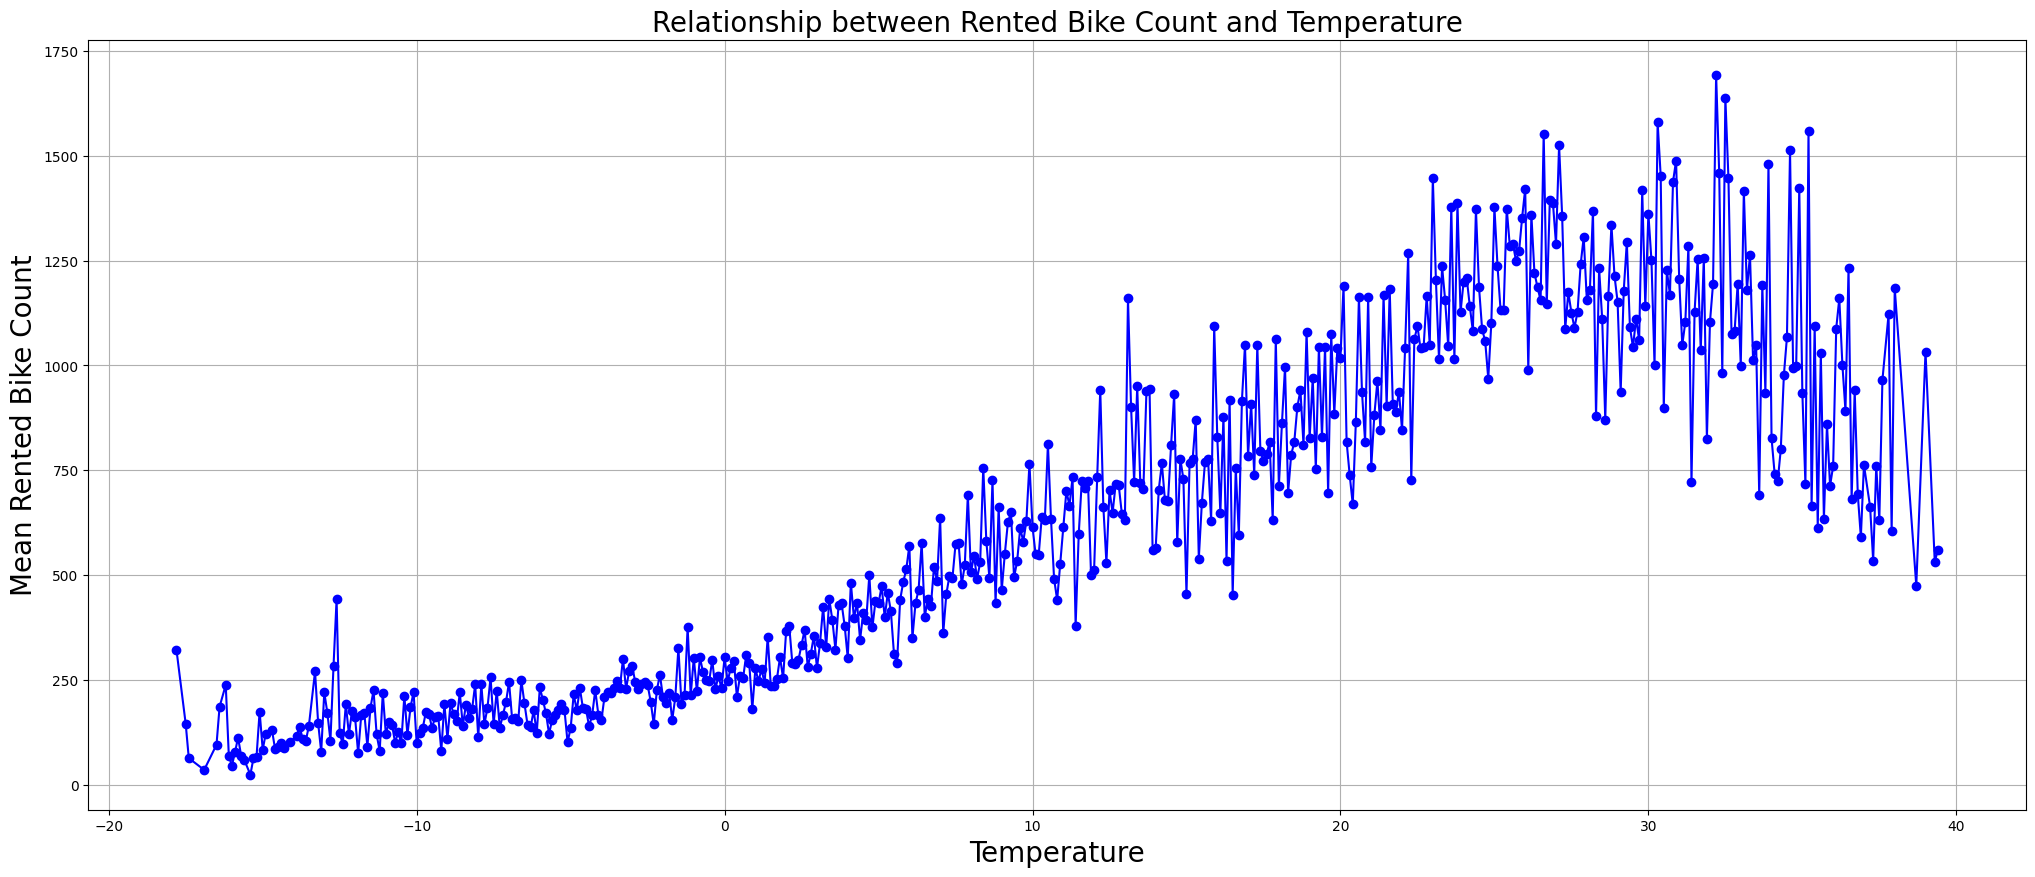

In [25]:
# Let's Group the data by 'Temperature' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Temperature')['Rented_Bike_Count'].mean()

# Let's Plotting the relationship between 'Rented_Bike_Count' and 'Temperature'
plt.figure(figsize=(25, 10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Temperature',fontsize=20)
plt.grid(True)
plt.show()


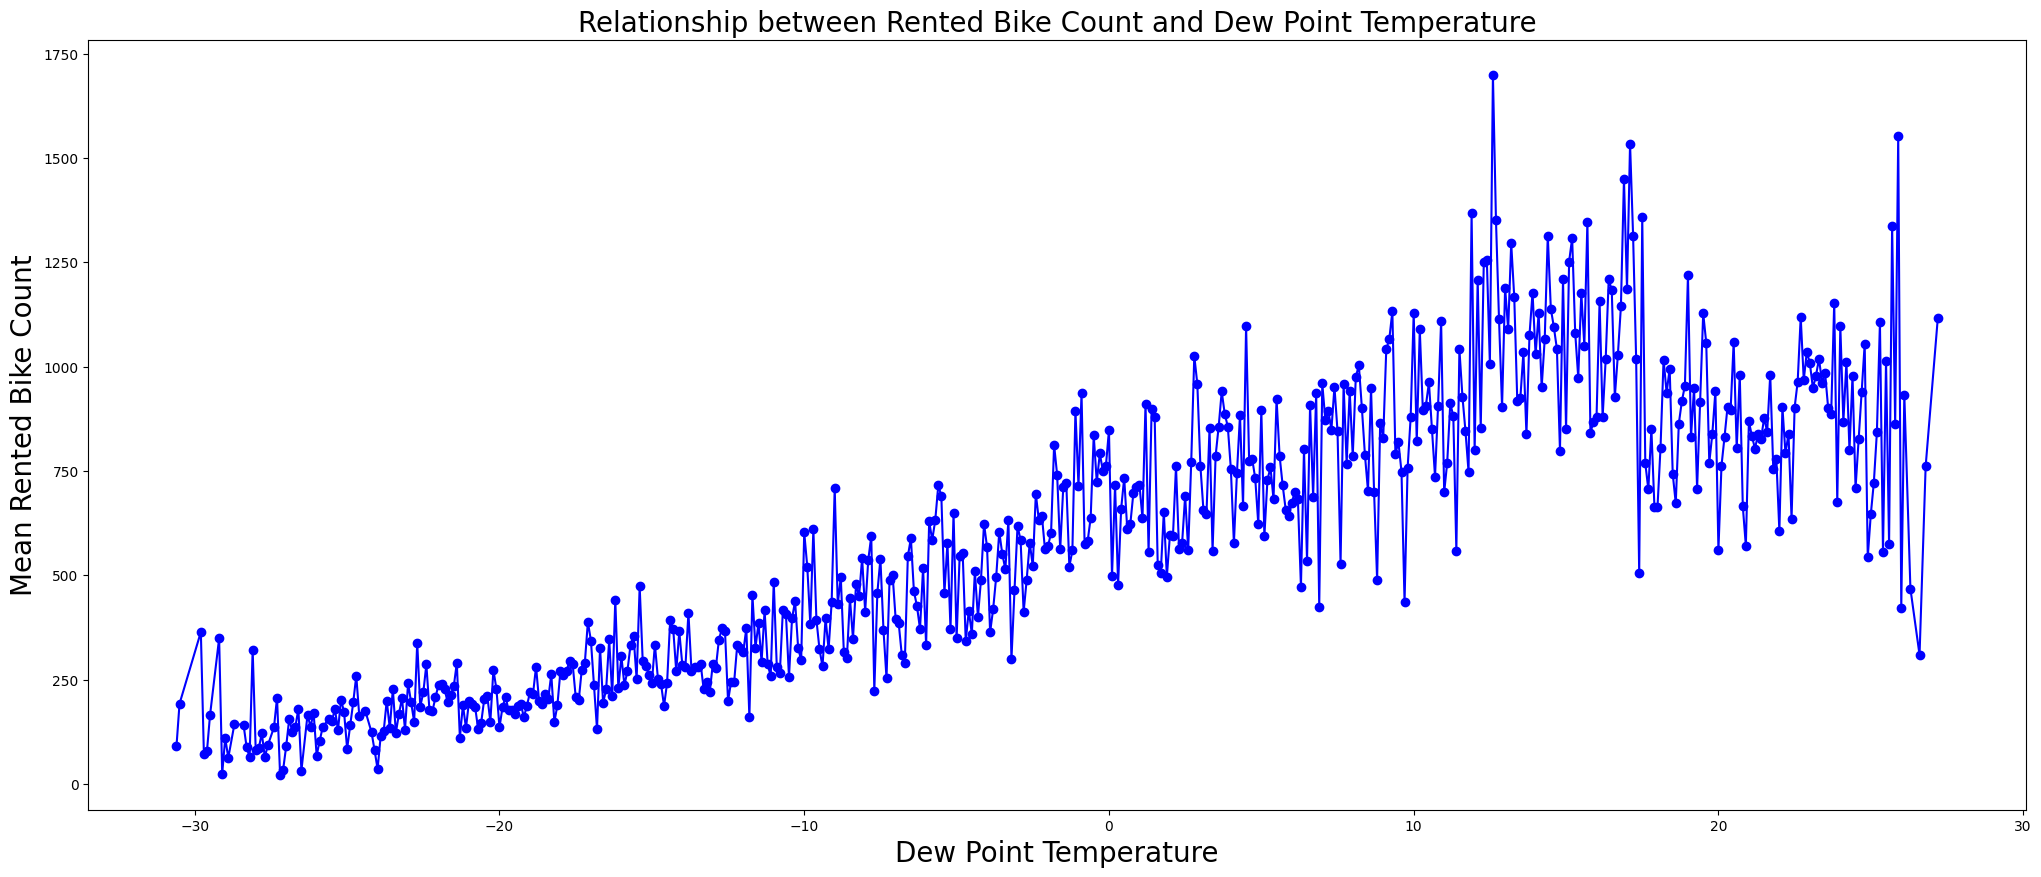

In [26]:
# Let's plot Relationship between Rented Bike Count and Dew Point Temperature.
plt.figure(figsize=(25, 10))
data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Dew Point Temperature',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Dew Point Temperature',fontsize=20)

plt.show()


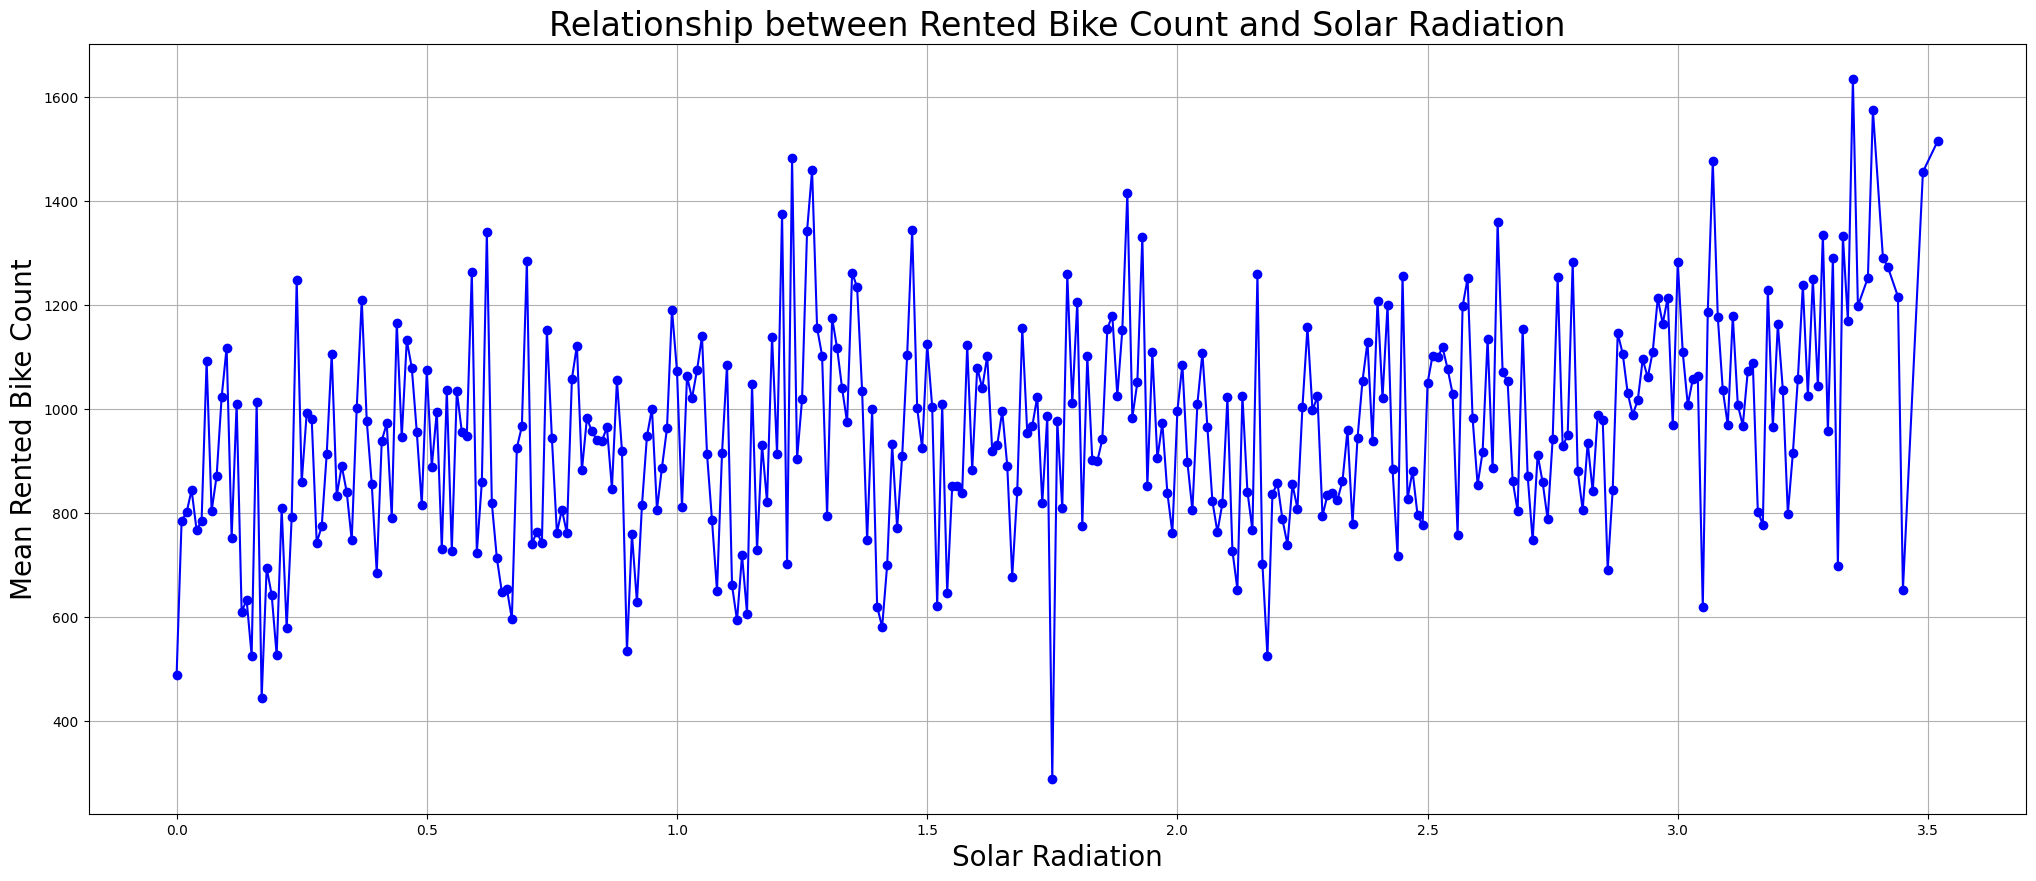

<Figure size 2500x1000 with 0 Axes>

In [27]:
# Let's plot a graph about Relationship between Rented Bike Count and Solar Radiation.
plt.figure(figsize=(25,10))
data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')
plt.xlabel('Solar Radiation', fontsize=20)
plt.ylabel('Mean Rented Bike Count', fontsize=20)
plt.title('Relationship between Rented Bike Count and Solar Radiation', fontsize=24)
plt.grid(True)
plt.figure(figsize=(25, 10))

plt.show()


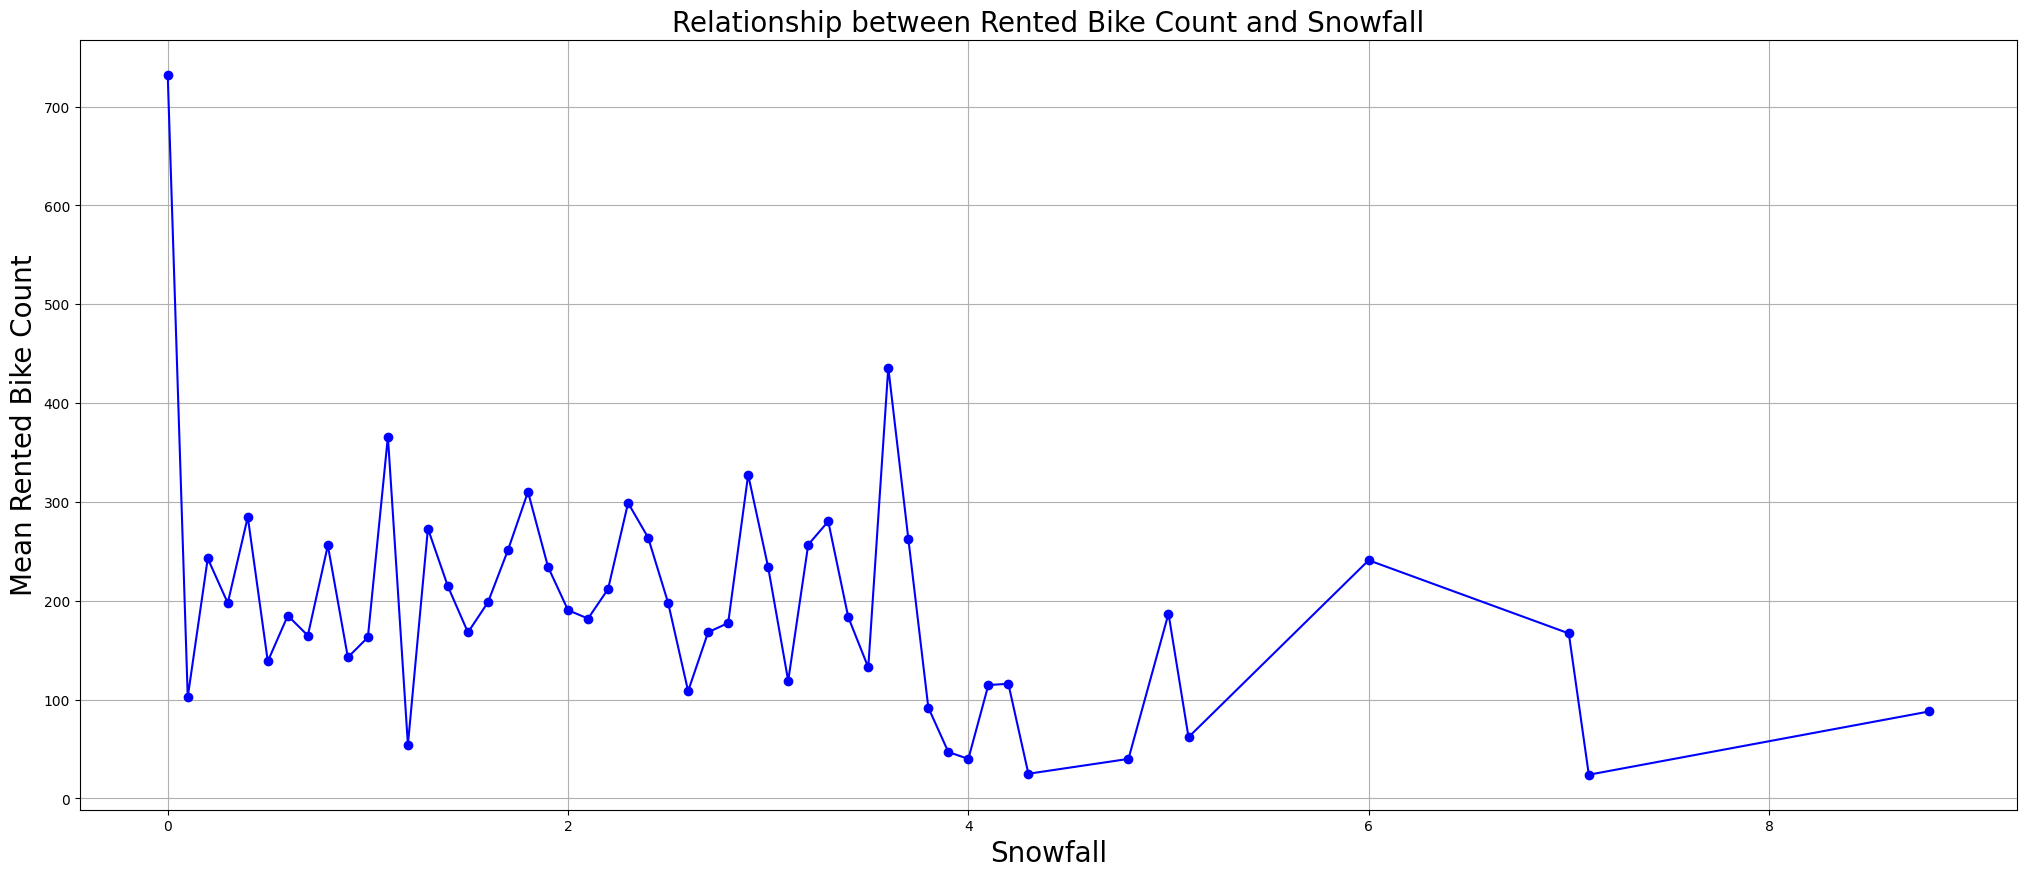

In [28]:
# Let's plot a graph about Relationship between Rented Bike Count and Snowfall .
# Group the data by 'Snowfall' and calculate the mean of 'Rented_Bike_Count'
grouped_data = data.groupby('Snowfall')['Rented_Bike_Count'].mean()

# Plotting the relationship between 'Rented_Bike_Count' and 'Snowfall'
plt.figure(figsize=(25,10))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')
plt.xlabel('Snowfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Snowfall',fontsize=20)
plt.grid(True)
plt.show()


* from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

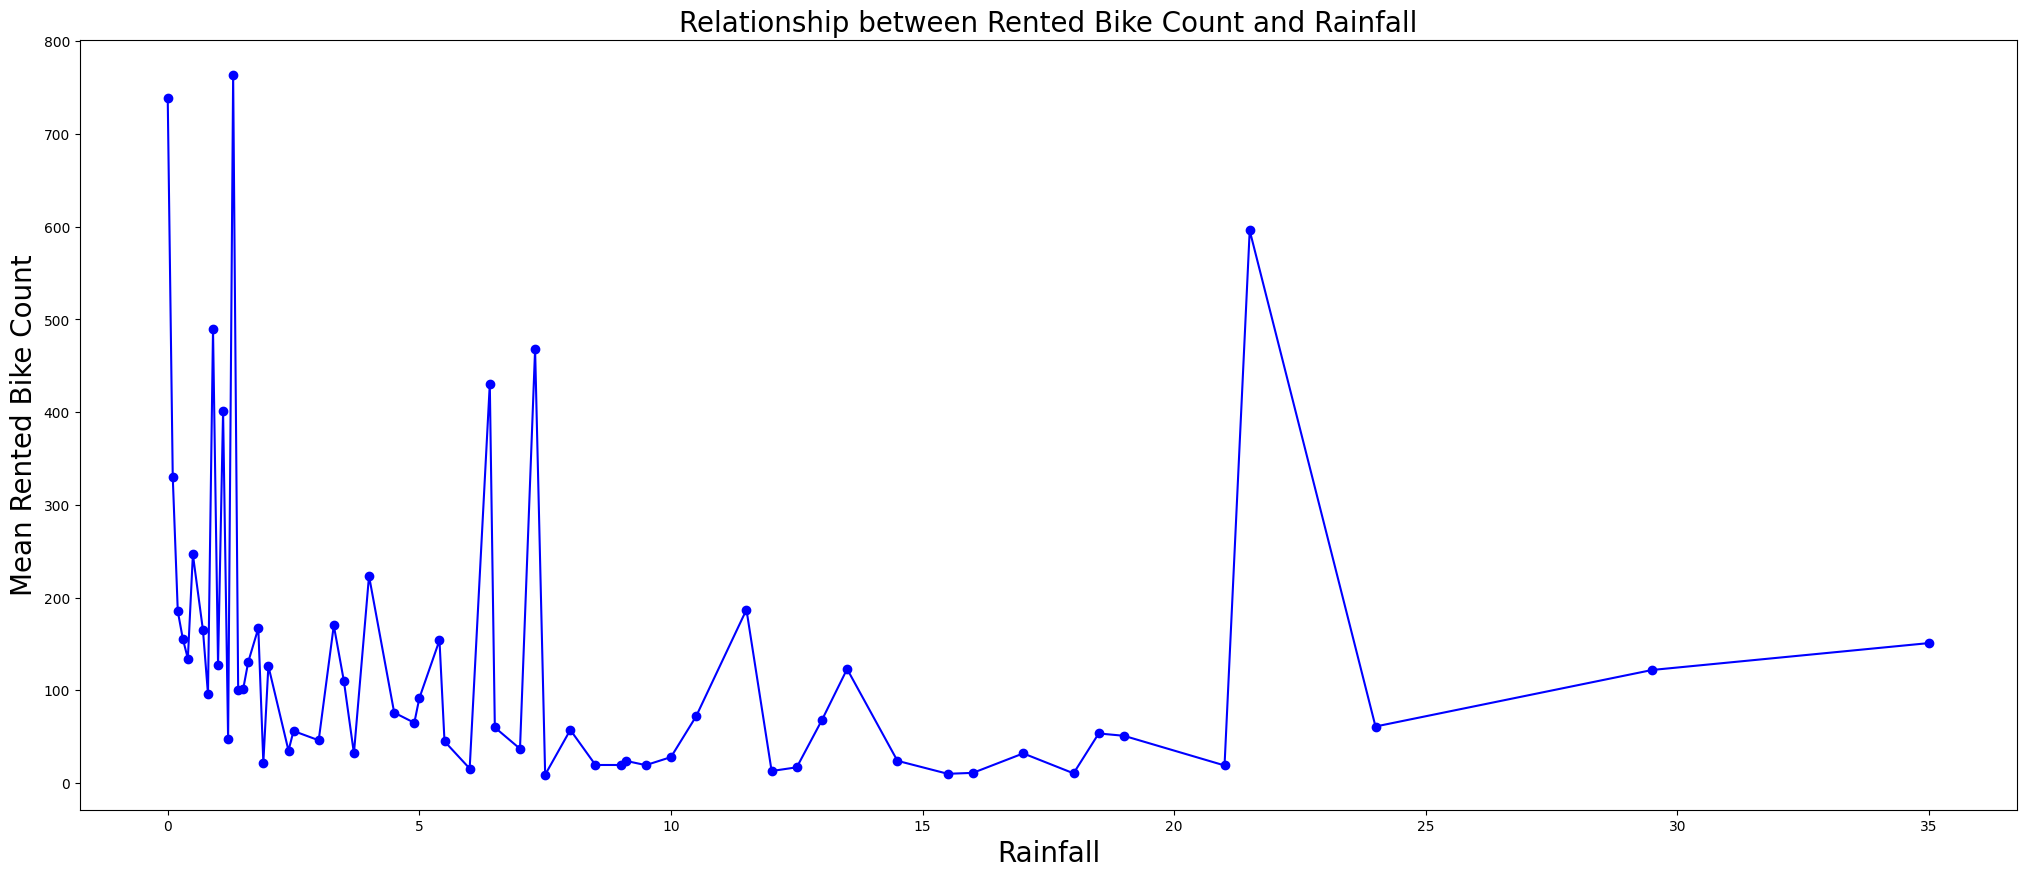

In [29]:
# Let's plot a graph inorder to understand Relationship between Rented Bike Count and Rainfall

plt.figure(figsize=(25,10))
data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot(marker='o', linestyle='-', color='b')

plt.xlabel('Rainfall',fontsize=20)
plt.ylabel('Mean Rented Bike Count',fontsize=20)
plt.title('Relationship between Rented Bike Count and Rainfall',fontsize=20)

plt.show()


####Regression plot

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

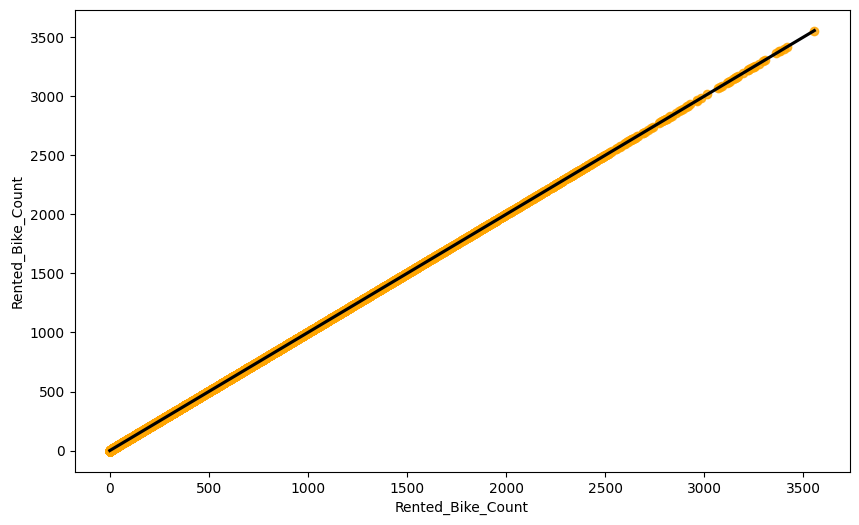

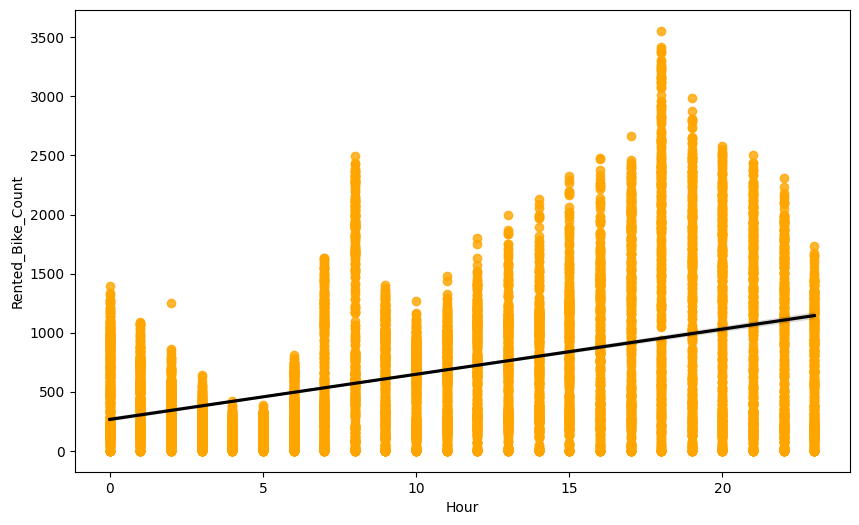

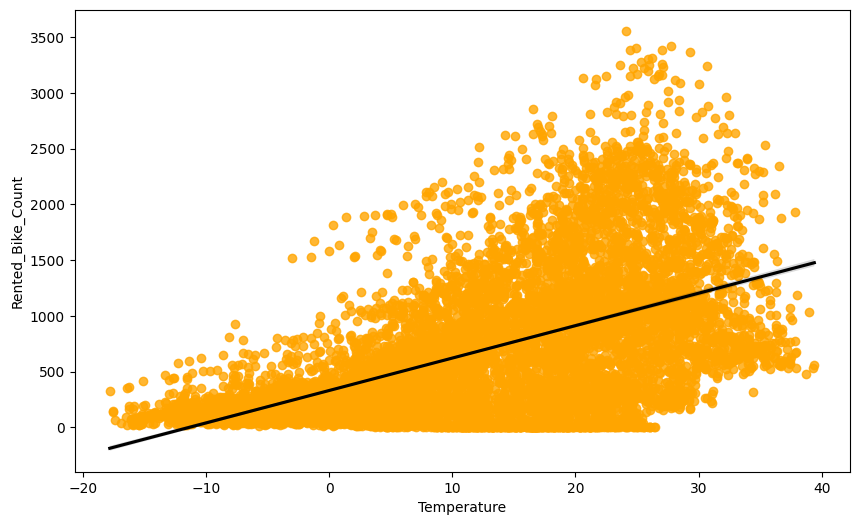

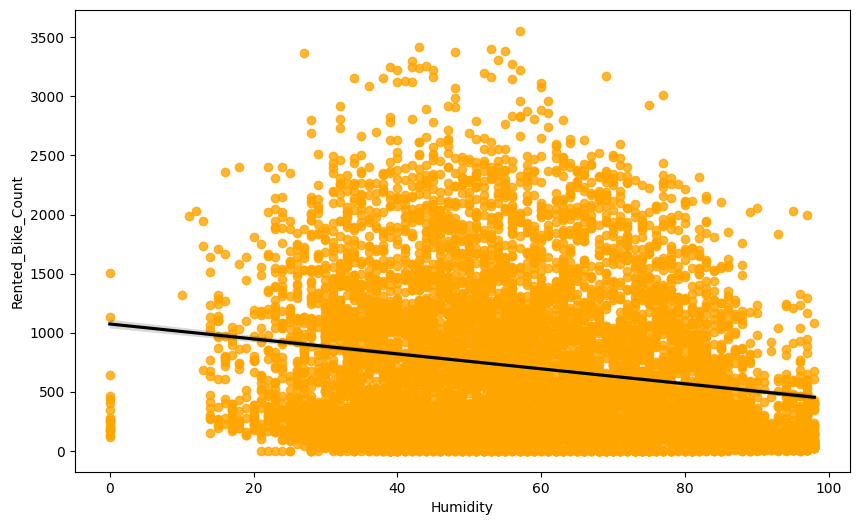

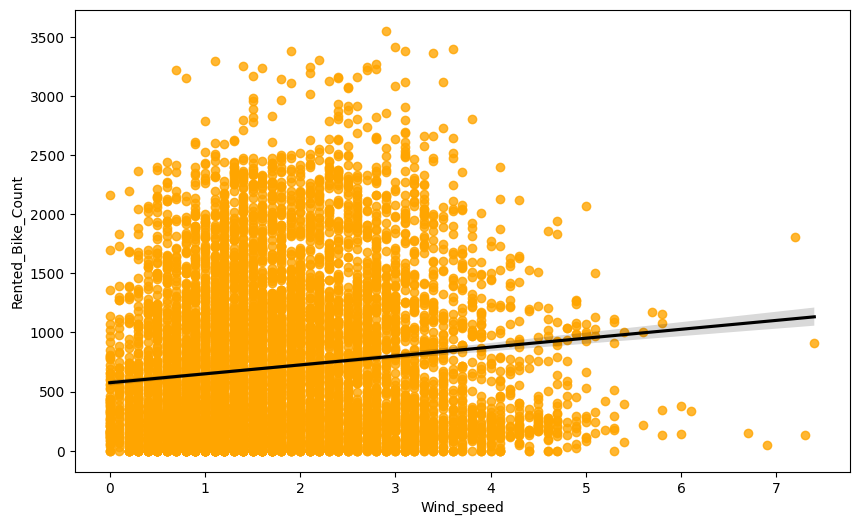

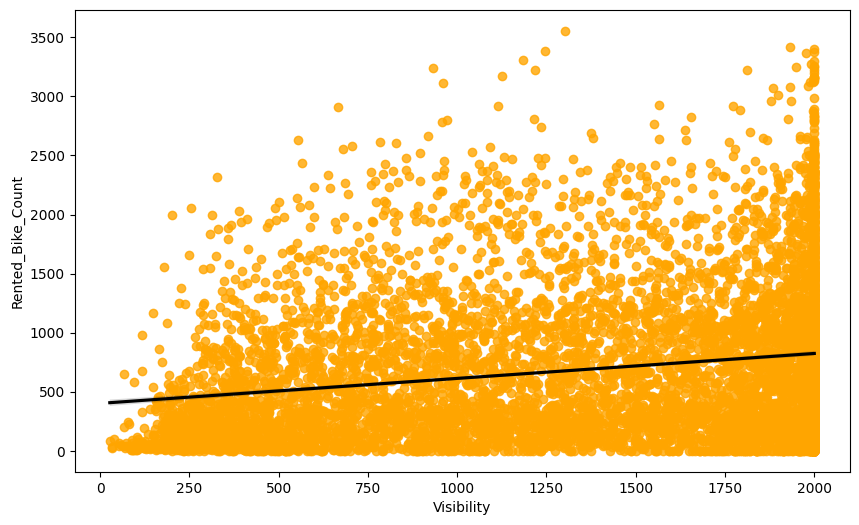

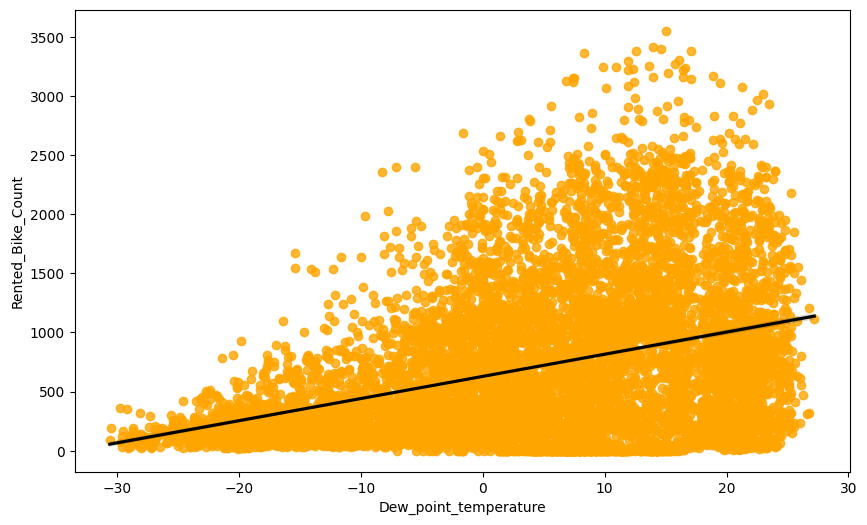

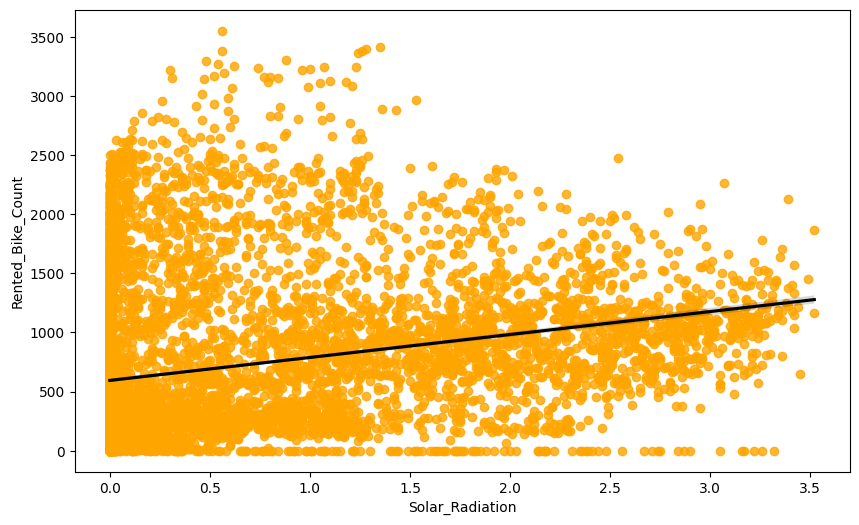

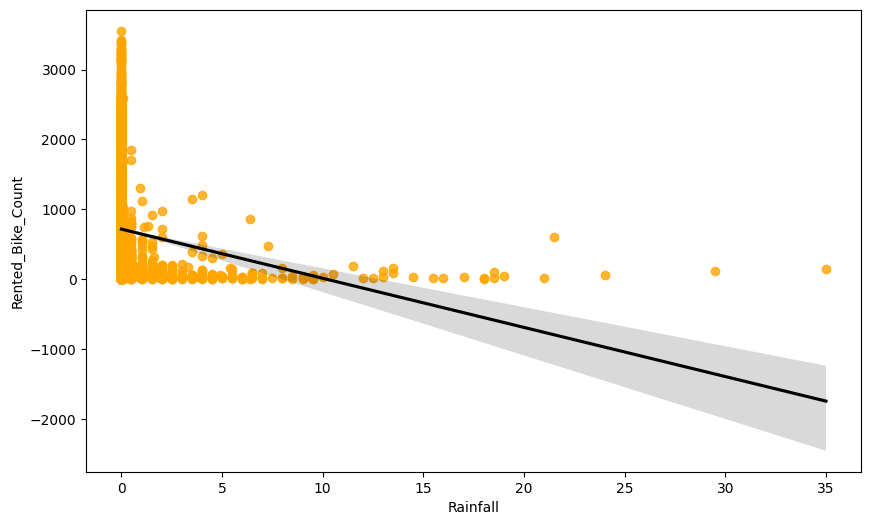

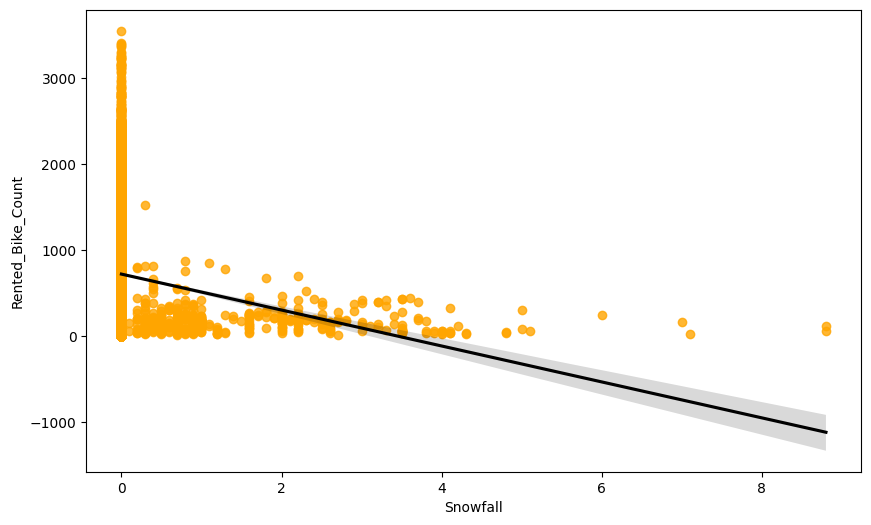

In [30]:
# Let's print the regression plot for all the numerical features
for col in num_dat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=data[col],y=data['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

<Axes: >

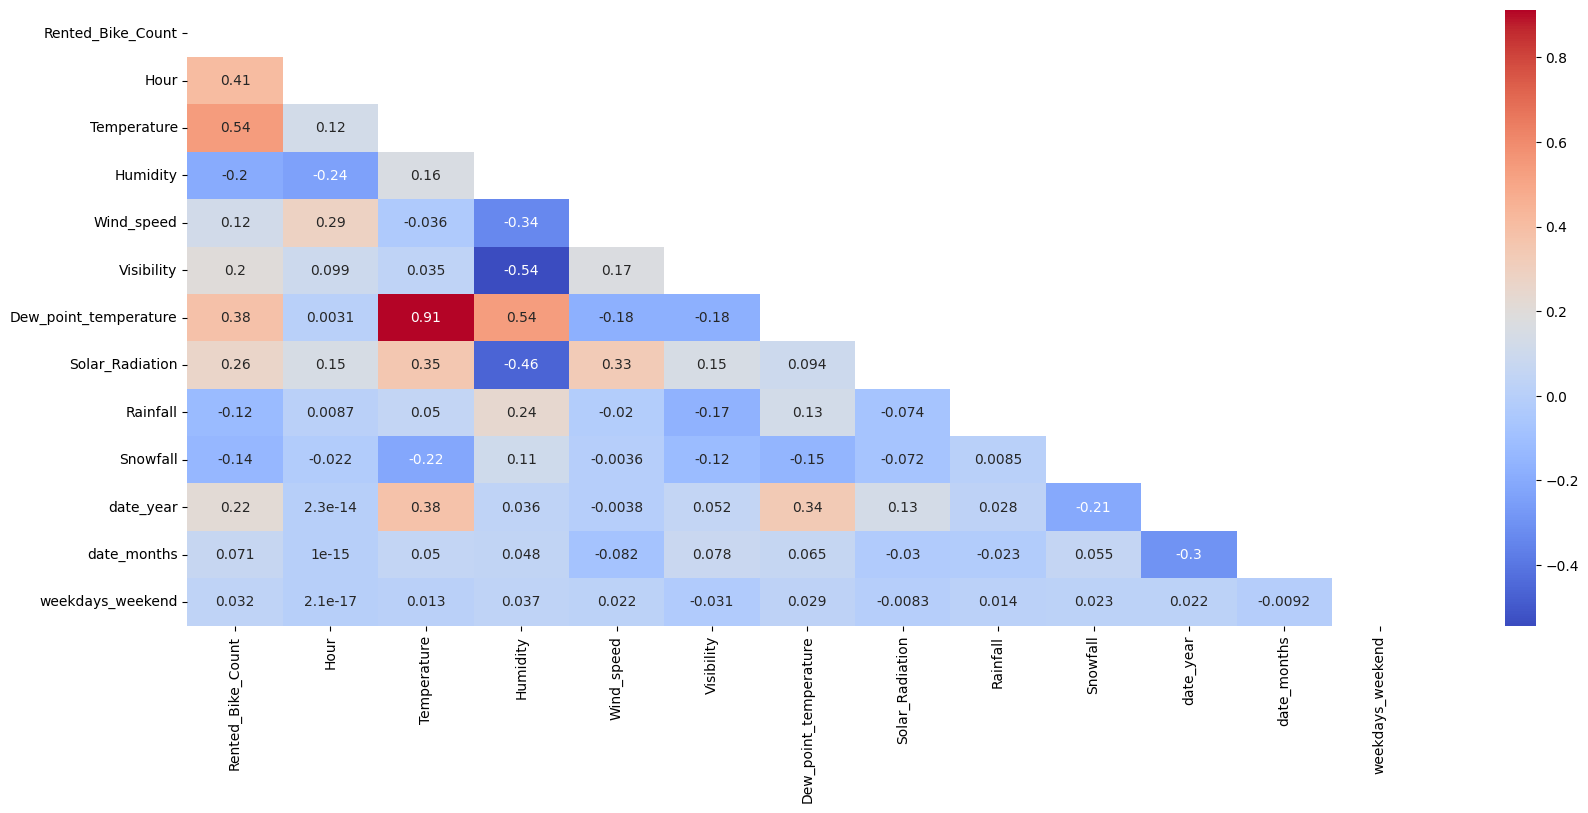

In [31]:
# Let's plot heatmap to see the correlation of feature to each other.
plt.figure(figsize=(20, 8))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')

From the above heatmap we can clearly see temperature and Dew point temperature is highly correlated with each other, so we can drop from the our dataframe.

## Outlier Treatment

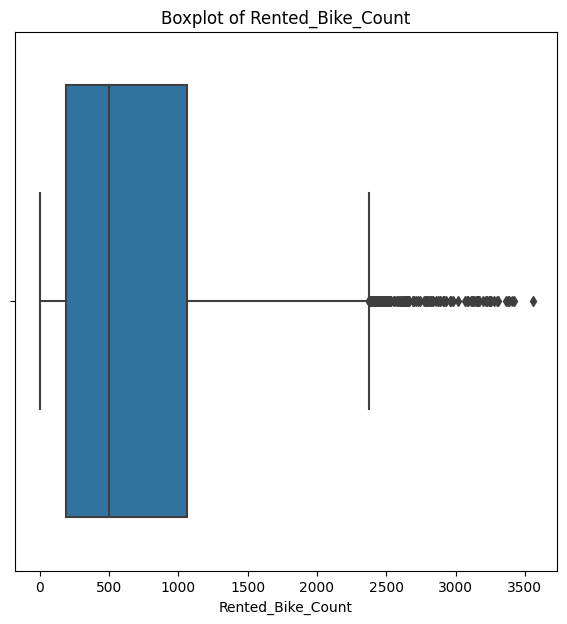

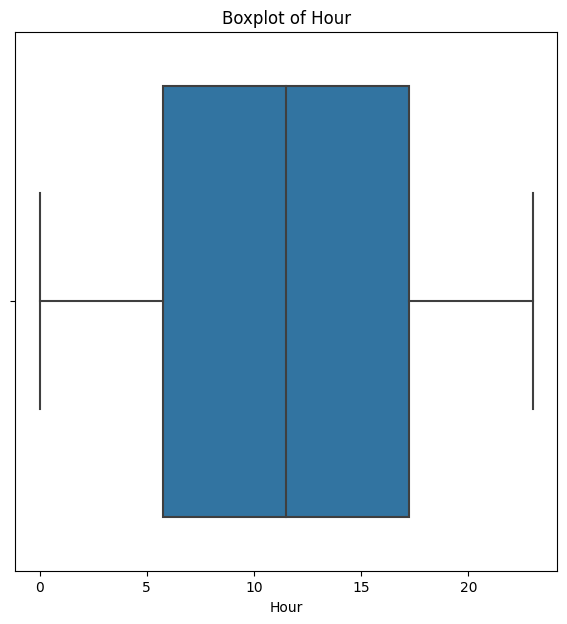

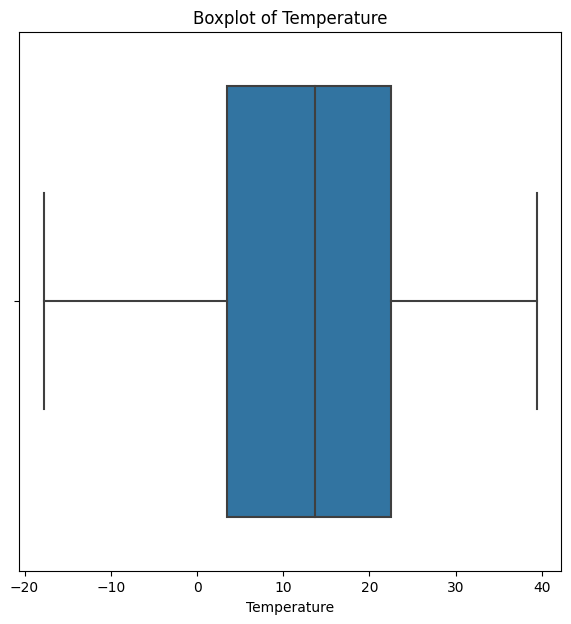

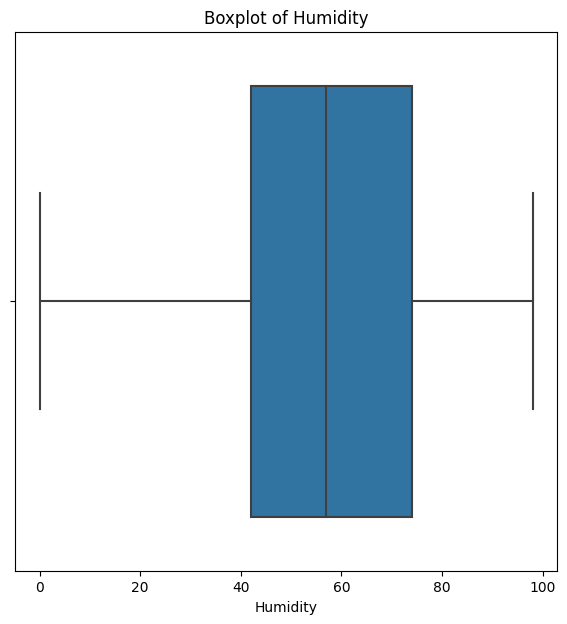

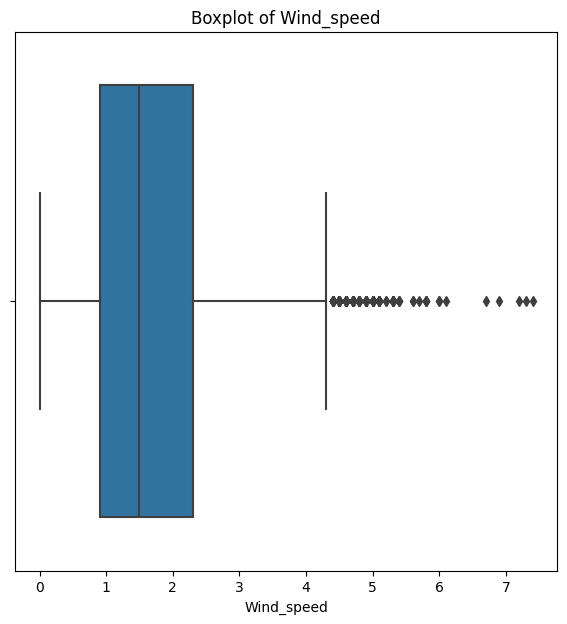

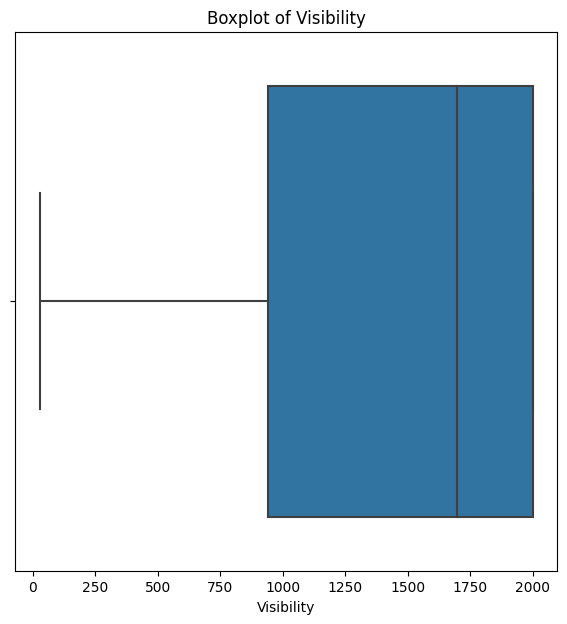

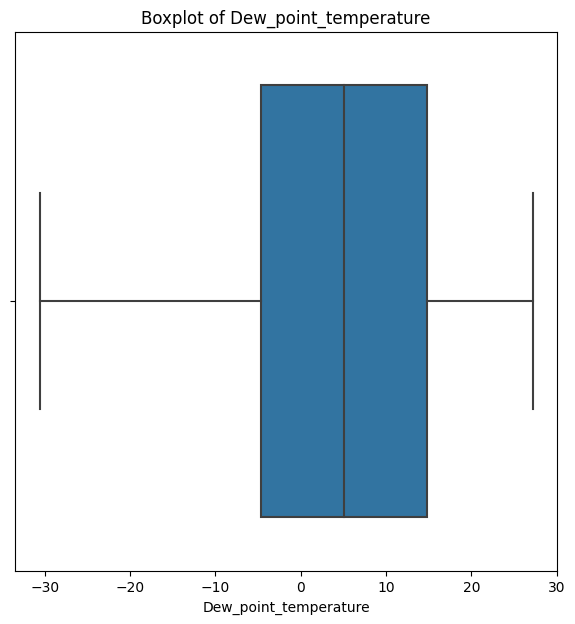

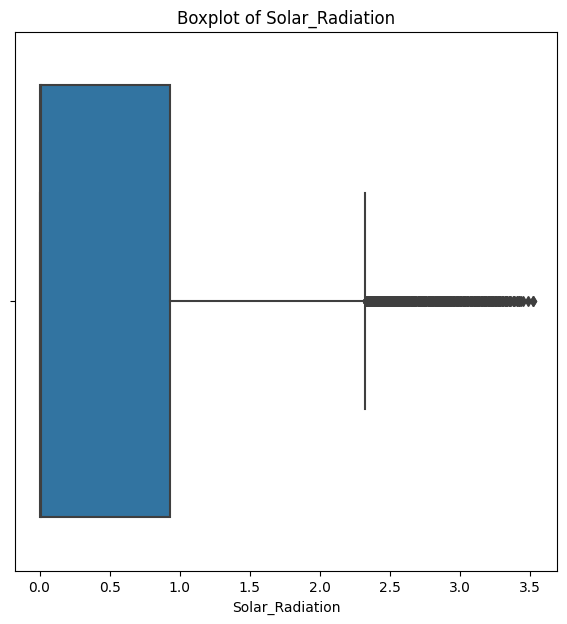

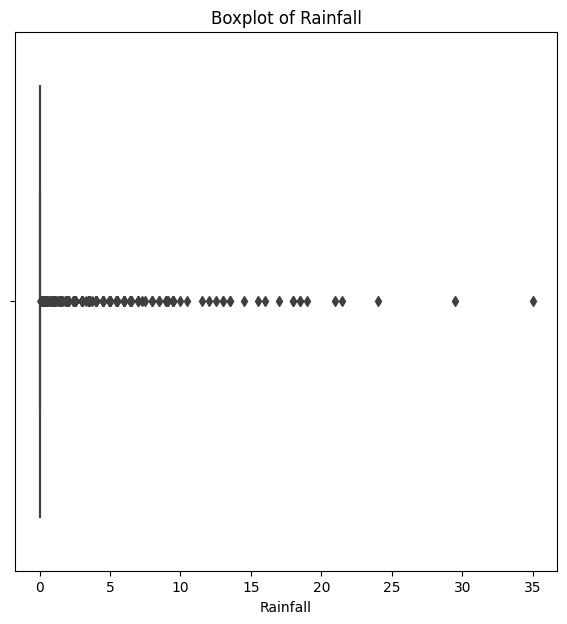

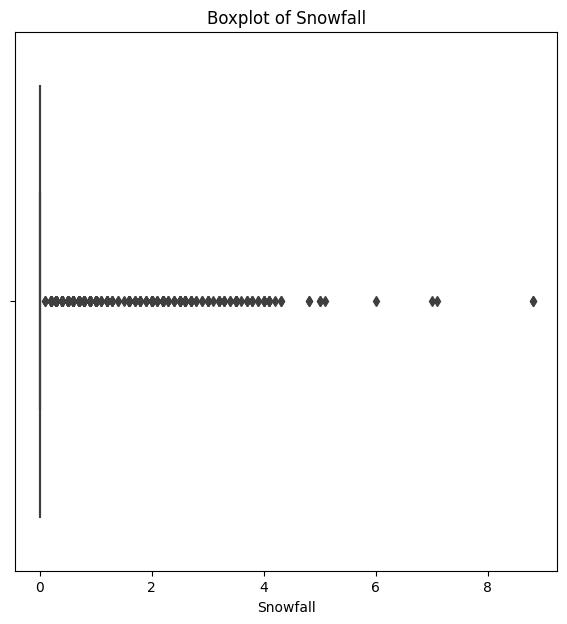

In [32]:
# Create separate boxplots for each column in 'num_dat'
for column in num_dat.columns:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x=num_dat[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


In [33]:
# Let's calculate max value of Rented Bike Count.
data['Rented_Bike_Count'].max()

3556

In [34]:
# Finding the boundary values
print("Highest allowed",data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std())
print("Lowest allowed",data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std())

Highest allowed 2639.5944580121673
Lowest allowed -1230.3903484231264


# **Capping**

In [35]:
# Let's define our boundary upper and lower.
upper_limit = data['Rented_Bike_Count'].mean() + 3*data['Rented_Bike_Count'].std()
lower_limit = data['Rented_Bike_Count'].mean() - 3*data['Rented_Bike_Count'].std()

In [36]:
print(upper_limit)

2639.5944580121673


In [37]:
# Let's find outlier by appling filter feature
data[(data['Rented_Bike_Count'] > 2639.59)].head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
3282 2018-04-16               2692    18         17.0        28         3.1   
3498 2018-04-25               2807    18         21.2        32         3.8   
3714 2018-04-05               2661    18         17.1        35         3.4   
3834 2018-09-05               3130    18         20.6        41         2.3   
3882 2018-11-05               2701    18         17.9        37         3.1   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
3282        2000                   -1.6             0.88       0.0       0.0   
3498        1927                    3.8             0.94       0.0       0.0   
3714        1961                    1.4             1.11       0.0       0.0   
3834        2000                    6.8             1.10       0.0       0.0   
3882        1819                    2.9             0.36       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months   date_day  \
3282  Spring  No Holiday             Yes       2018            4     Monday   
3498  Spring  No Holiday             Yes       2018            4  Wednesday   
3714  Spring  No Holiday             Yes       2018            4   Thursday   
3834  Spring  No Holiday             Yes       2018            9  Wednesday   
3882  Spring  No Holiday             Yes       2018           11     Monday   

      weekdays_weekend Temperature_Bins  
3282                 1         (10, 20]  
3498                 1         (20, 30]  
3714                 1         (10, 20]  
3834                 1         (20, 30]  
3882                 1         (10, 20]

Ensures that any 'Rented_Bike_Count' value that is above the 'upper_limit' is replaced with the 'upper_limit', and any value below the 'lower_limit' is replaced with the 'lower_limit', effectively treating outliers in the dataset.

In [38]:
# # Let's create a function for treating outlier.

# data['Rented_Bike_Count'] = np.where(
#     data['Rented_Bike_Count']>upper_limit,
#     upper_limit,
#     np.where(
#         data['Rented_Bike_Count']<lower_limit,
#         lower_limit,
#         data['Rented_Bike_Count']
#     )
# )

<Axes: xlabel='Rented_Bike_Count'>

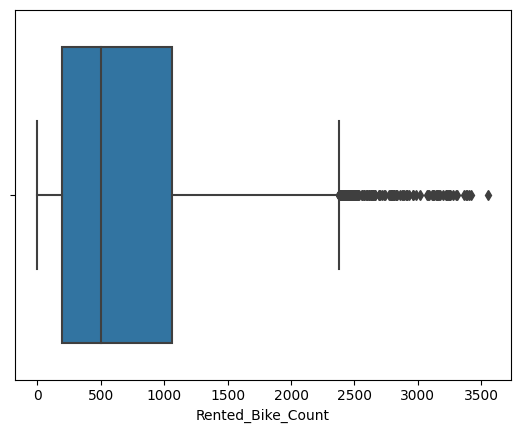

In [39]:
# Let's plot boxplot in order to see outlier's treatment of our dataset.
sns.boxplot(x=data['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

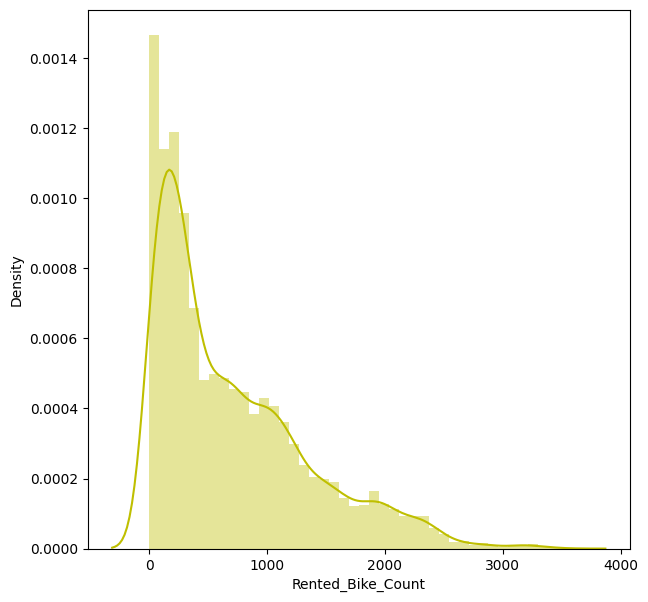

In [40]:
# Let's plot a distplot for Dependent variable Rentend Bike Count
plt.figure(figsize=(7,7))
sns.distplot(data['Rented_Bike_Count'],color="y")

In [41]:
# Let's find out skewness of our Rented Bike Count feature
data['Rented_Bike_Count'].skew()

1.1534281773679014

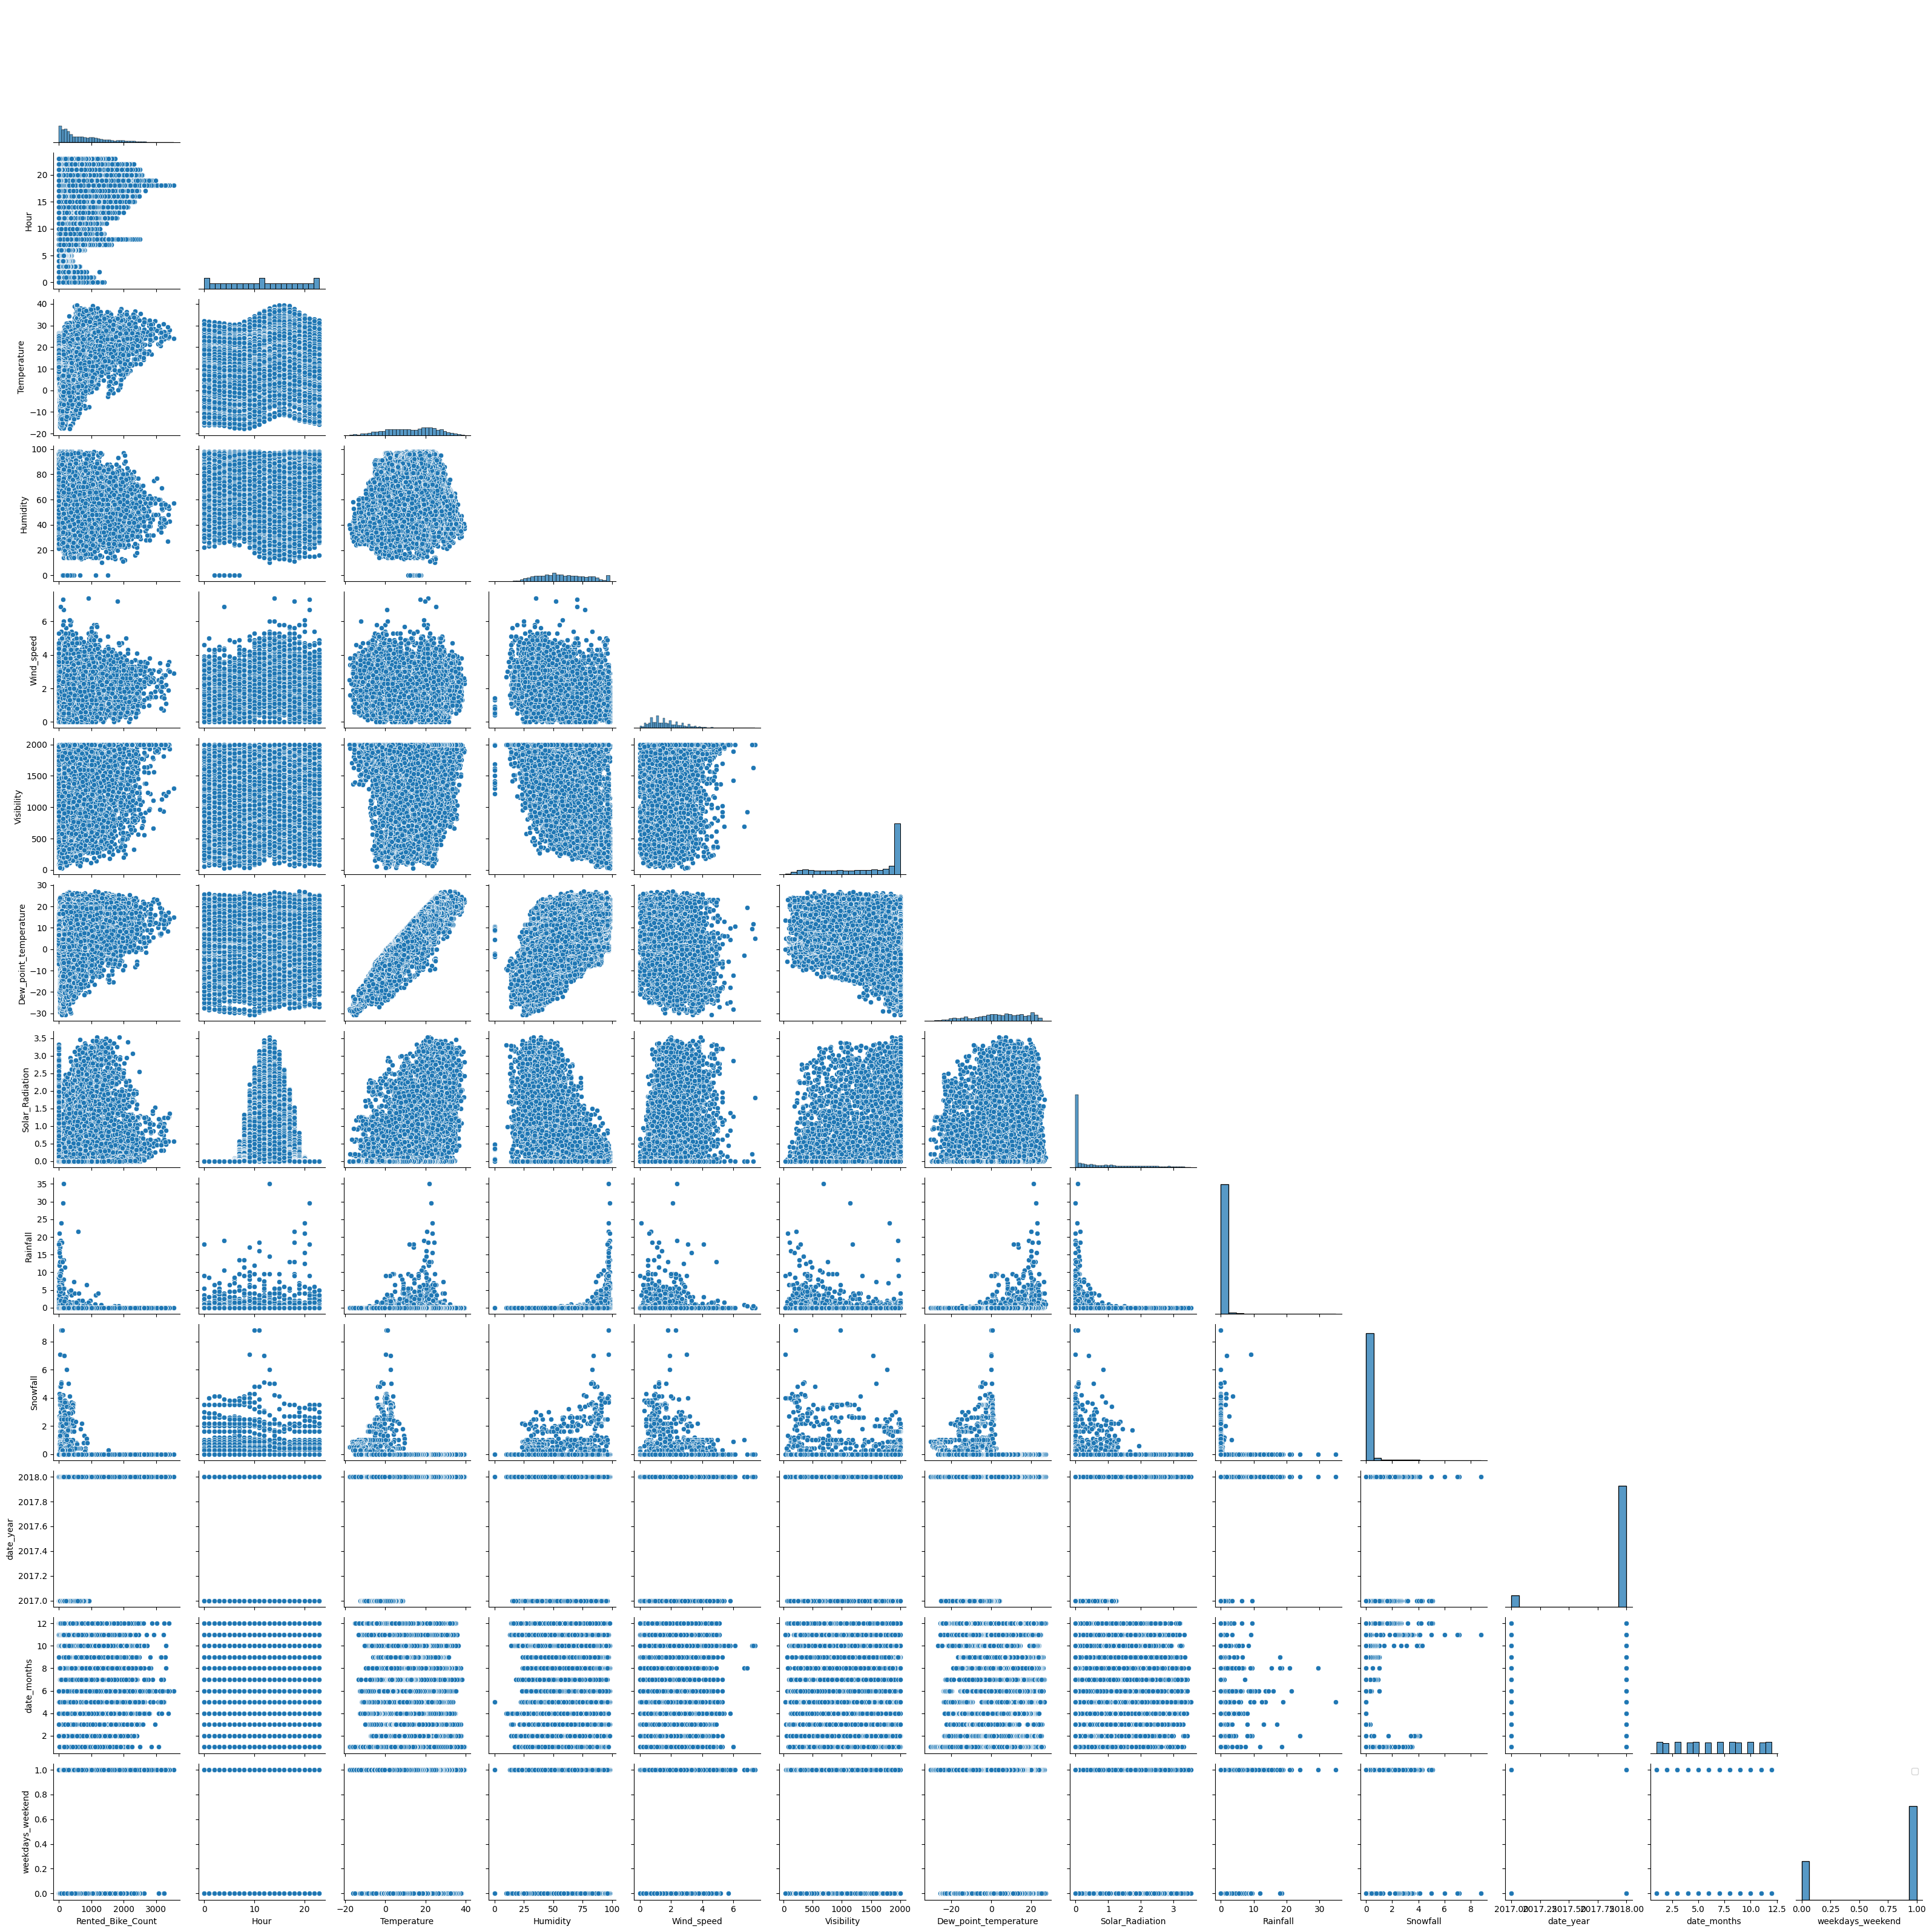

In [42]:
# Let's visualize Pair Plot visualization code.

sns.pairplot(data ,corner=True)
plt.legend()

In [43]:
# Let's check count the 0 value for our depent feature.
data[data['Rented_Bike_Count']==0].size

5605

In [44]:
# Let's see the random rows from our dataset.
data.sample(5)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
2994 2018-04-04               2402    18         16.0        47         2.1   
5465 2018-07-16               1425    17         33.0        46         3.1   
3155 2018-11-04                  0    11         14.9        44         4.0   
7329 2018-02-10                  0     9         13.9        66         1.6   
4094 2018-05-20               1680    14         20.3        30         1.8   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
2994        2000                    4.6             0.79       0.0       0.0   
5465        1926                   19.8             1.89       0.0       0.0   
3155        1468                    2.7             2.75       0.0       0.0   
7329        1427                    7.6             1.11       0.0       0.0   
4094        2000                    2.1             1.01       0.0       0.0   

     Seasons     Holiday Functioning_Day  date_year  date_months   date_day  \
2994  Spring  No Holiday             Yes       2018            4  Wednesday   
5465  Summer  No Holiday             Yes       2018            7     Monday   
3155  Spring  No Holiday              No       2018           11     Sunday   
7329  Autumn  No Holiday              No       2018            2   Saturday   
4094  Spring  No Holiday             Yes       2018            5     Sunday   

      weekdays_weekend Temperature_Bins  
2994                 1         (10, 20]  
5465                 1         (30, 40]  
3155                 0         (10, 20]  
7329                 0         (10, 20]  
4094                 0         (20, 30]

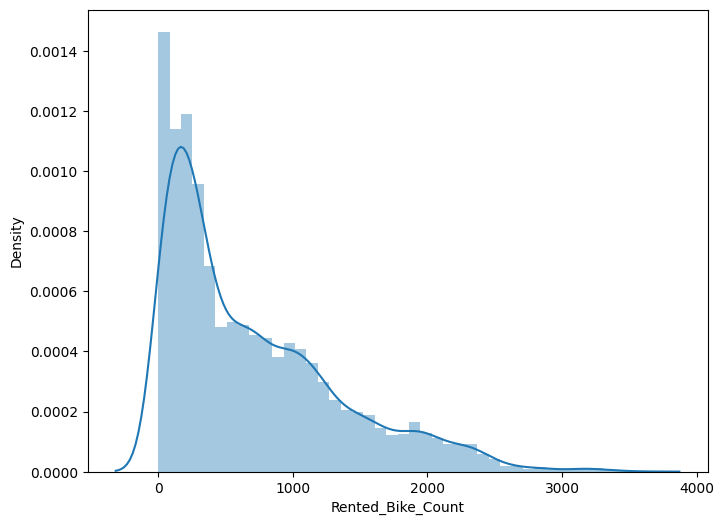

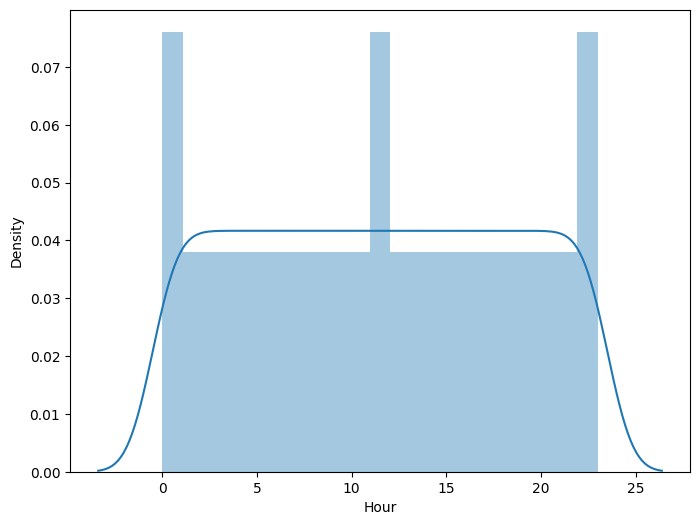

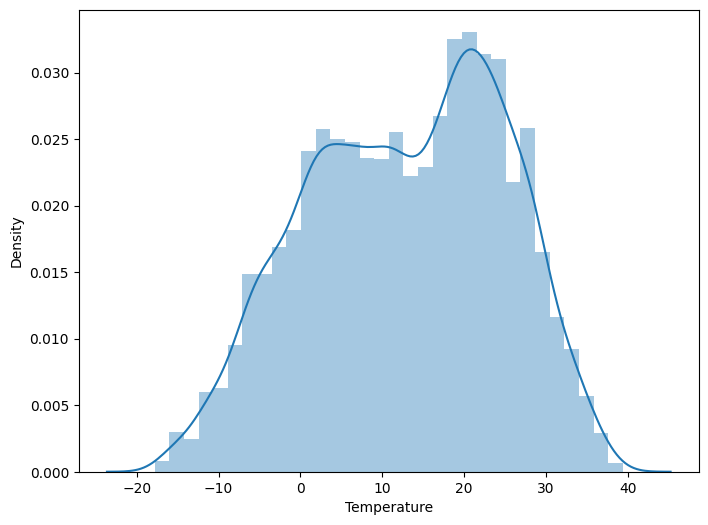

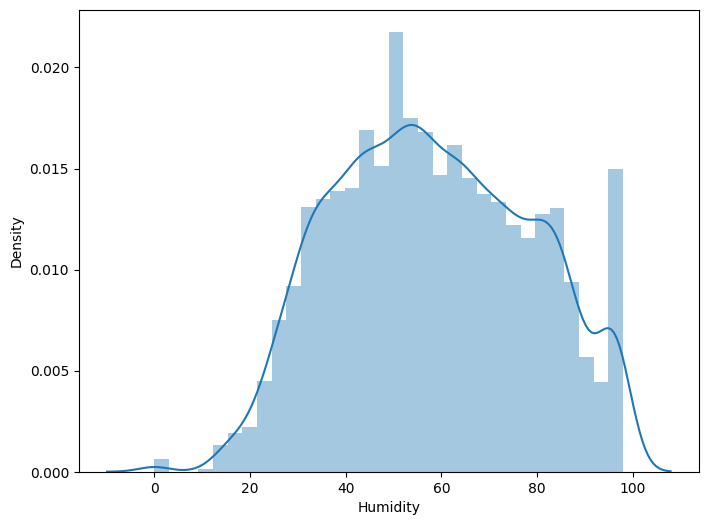

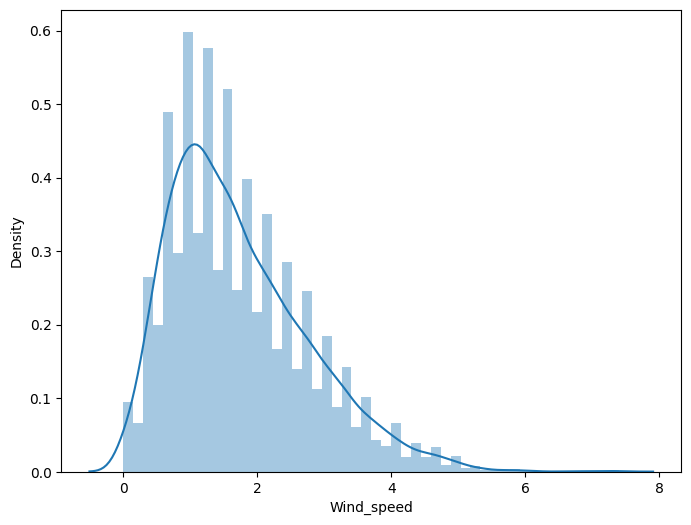

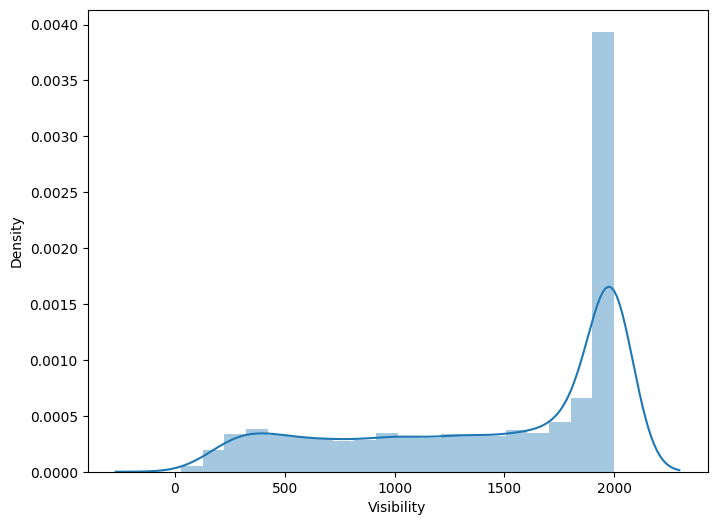

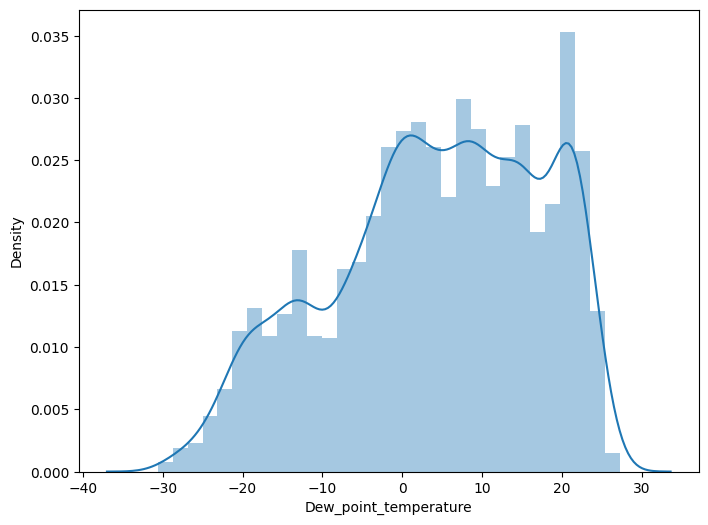

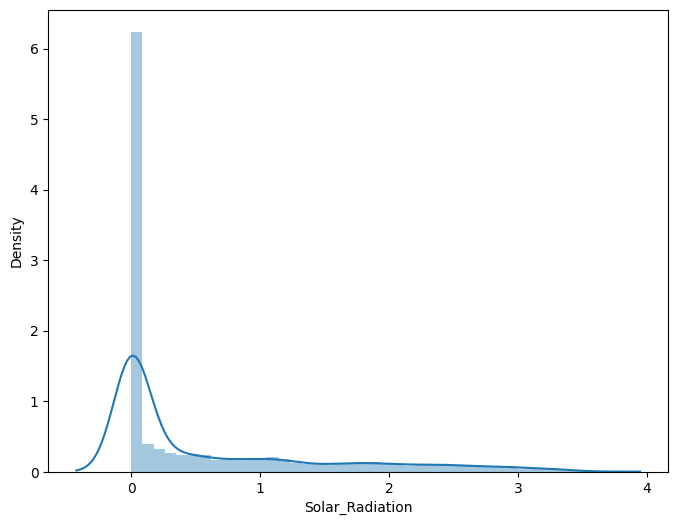

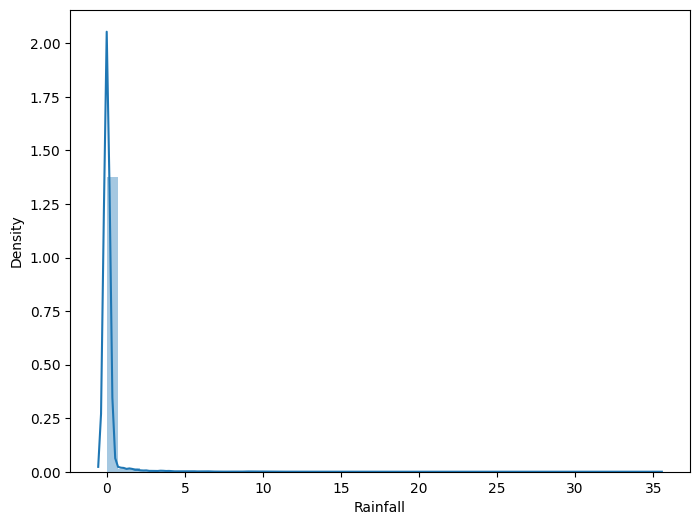

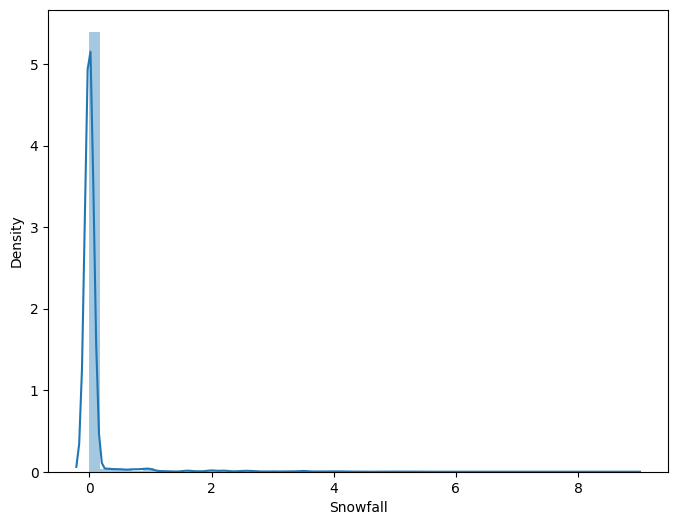

In [45]:
# Let's plot a graph distplot of all graph by using if else condition.

for col in num_dat:
  plt.figure(figsize=(8,6))
  sns.distplot(x=data[col])
  plt.xlabel(col)
plt.show()

#**Q-Q chart**

These plots compare the quantiles of the observed data against the quantiles of a theoretical distribution, typically the standard normal distribution. Let's  gain insights into the distributional properties of the data, identify departures from normality, and determine the need for data transformations.

In [46]:
# Let's plot Q-Q plot to see our data

from scipy import stats

def diagnostic_plots(data,variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.subplot(1,2,2)

  stats.probplot(data[variable],dist ='norm', plot=plt)
  plt.show()

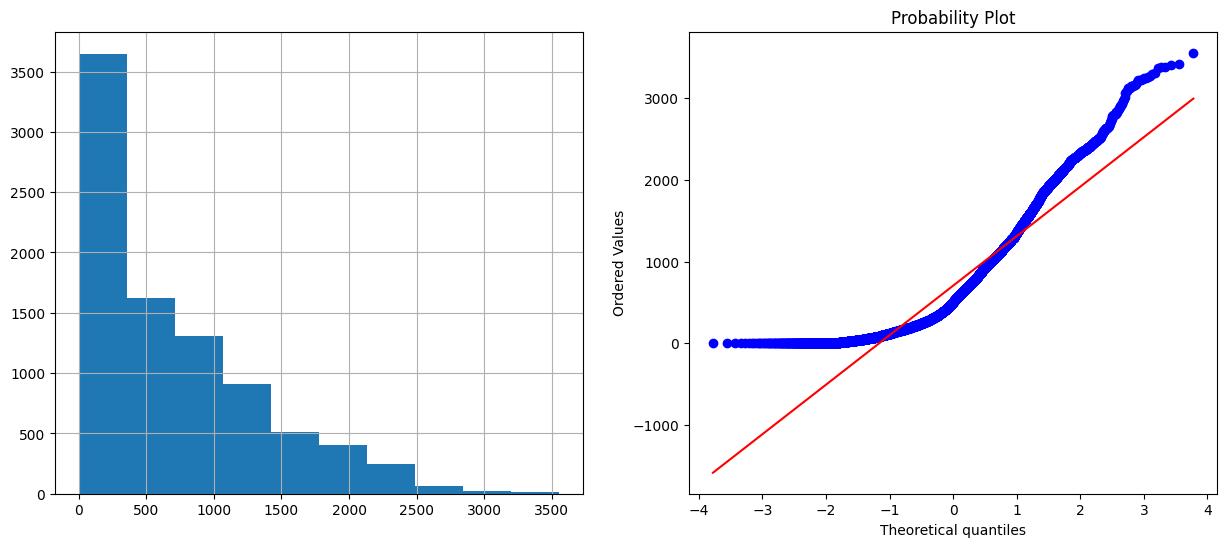

In [47]:
# Let's plot a graph diagnostic plot for Rented Bike Count
diagnostic_plots(data,'Rented_Bike_Count')

In [48]:
data['Rented_Bike_Count'].skew()

1.1534281773679014

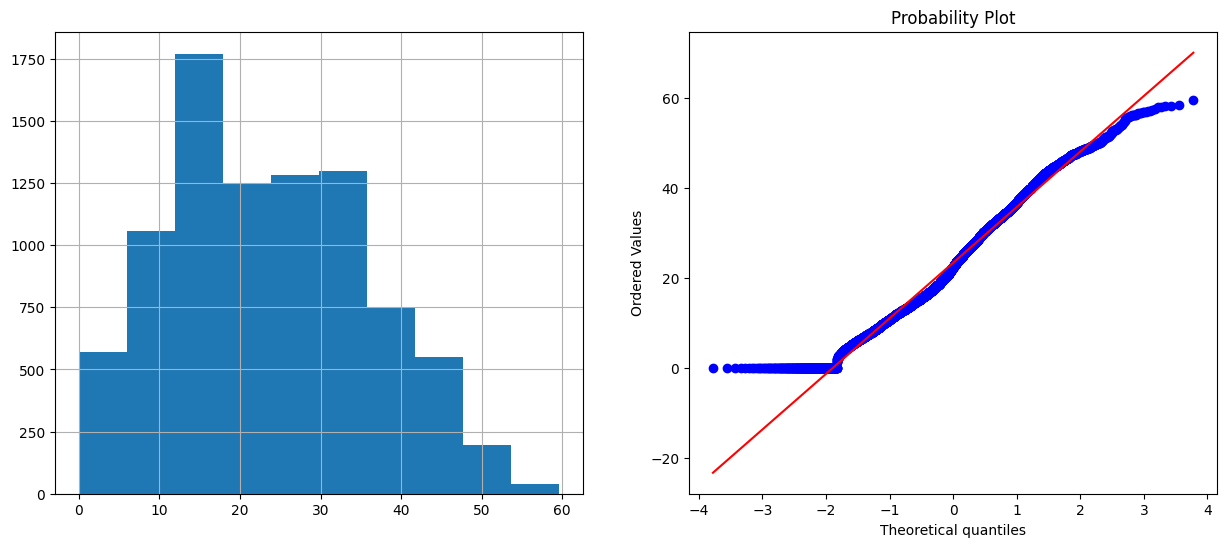

In [49]:
# Sqaure Root Tansformation
data['sqr_Rented_Bike_Count']=data['Rented_Bike_Count']**(1/2)
diagnostic_plots(data,'sqr_Rented_Bike_Count')

In [50]:
# Let's check the skewness of Rented Bike Count
data['Rented_Bike_Count'].skew()

1.1534281773679014

In [51]:
# Let's check the skewness of Rented Bike Count after applying squar root transformation
data['sqr_Rented_Bike_Count'].skew()

0.237362090985412

#**Column Transformation**

Column Transformation is an essential step in preparing data for machine learning models. It involves modifying or encoding the features (columns) of the dataset to improve the performance and effectiveness of the machine learning algorithms.

In [52]:
# Let's apply if else condition in order to see which skewness of our data
# Let's import skew function from scipy.stats library

from scipy.stats import skew

# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")
        else:
            print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")
    else:
        print(f"Feature '{column}' has acceptable skewness")



Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Visibility' is left-skewed with skewness -0.70
Feature 'Dew_point_temperature' has acceptable skewness
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44


In [53]:
# Let's categories the right and left skew features.
# Calculate skewness of each feature
skewness = num_dat.apply(skew)

# Define the threshold for acceptable skewness
threshold = 0.5

# Initialize lists for different types of skewness
left_skew_columns = []
right_skew_columns = []
acceptable_skew_columns = []

# Check skewness of each feature
for column in skewness.index:
    if abs(skewness[column]) > threshold:
        if skewness[column] < 0:
            left_skew_columns.append(column)
        else:
            right_skew_columns.append(column)
    else:
        acceptable_skew_columns.append(column)

# Print the results
print("Columns with left skew:")
for column in left_skew_columns:
    print(f"Feature '{column}' is left-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with right skew:")
for column in right_skew_columns:
    print(f"Feature '{column}' is right-skewed with skewness {skewness[column]:.2f}")

print("\nColumns with acceptable skewness:")
for column in acceptable_skew_columns:
    print(f"Feature '{column}' has acceptable skewness")


Columns with left skew:
Feature 'Visibility' is left-skewed with skewness -0.70

Columns with right skew:
Feature 'Rented_Bike_Count' is right-skewed with skewness 1.15
Feature 'Wind_speed' is right-skewed with skewness 0.89
Feature 'Solar_Radiation' is right-skewed with skewness 1.50
Feature 'Rainfall' is right-skewed with skewness 14.53
Feature 'Snowfall' is right-skewed with skewness 8.44

Columns with acceptable skewness:
Feature 'Hour' has acceptable skewness
Feature 'Temperature' has acceptable skewness
Feature 'Humidity' has acceptable skewness
Feature 'Dew_point_temperature' has acceptable skewness


In [54]:
from scipy.stats import yeojohnson

# Assuming 'data' is your DataFrame containing the 'Visibility' column

# Apply the Yeo-Johnson transformation on 'Visibility'
transformed_visibility, lambda_val = yeojohnson(data['Visibility'])

# Create a new column with the transformed values
data['Transformed_Visibility'] = transformed_visibility

# Print the lambda value, which indicates the type of transformation applied
print(f"Lambda value: {lambda_val:.4f}")



Lambda value: 1.4252


Skewness of 'Transformed_Visibility': -0.52


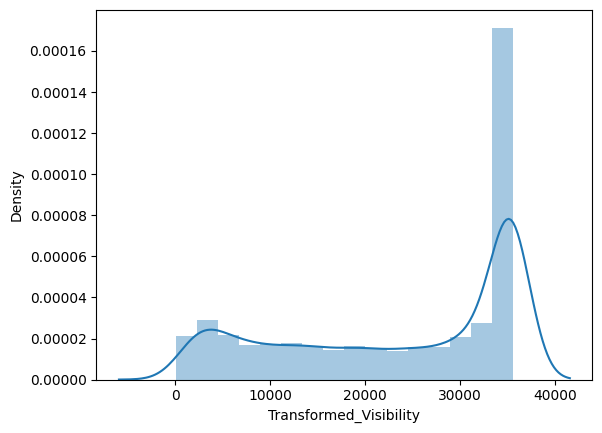

In [55]:
# Calculate the skewness of the 'Visibility' feature
visibility_skewness = data['Transformed_Visibility'].skew()

# Display the skewness value
print(f"Skewness of 'Transformed_Visibility': {visibility_skewness:.2f}")

# Create a distribution plot of 'Visibility'
sns.distplot(data['Transformed_Visibility'])

# Show the plot
plt.show()


In [56]:
# Let's check the skewness of Transformed Visibility
data['Transformed_Visibility'].skew()

-0.5208033974294499

In [57]:
# Let's print all column's skewness before applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 1.1534281773679014
Wind_speed 0.8909547980299266
Solar_Radiation 1.5040397173602802
Rainfall 14.5332322425467
Snowfall 8.440800781484777


In [58]:
# Let's apply square root column transformation to all right skew column
for column in right_skew_columns:
  data[column]=np.sqrt(num_dat[column])

In [59]:
# Let's print all column's skewness after applying column transformation.
for col in right_skew_columns:
  print(col,data[col].skew())

Rented_Bike_Count 0.237362090985412
Wind_speed -0.005368836345296517
Solar_Radiation 0.8075034623392892
Rainfall 6.6351459550336935
Snowfall 5.31480696909106


In [60]:
!pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.9 MB/s eta 0:00:00


In [61]:
import sweetviz as sv


# Generate the Sweetviz report
report = sv.analyze(data)

# Visualize the report
report.show_html()


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#Multicollinearity

In [62]:
# Let's check Multicollinearity by using variance inflation factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [63]:
# Let's calculate the variance inflation factor (VIF) for all of the variables in the data DataFrame, except for the Rented_Bike_Count variable.
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented_Bike_Count']]])

variables         VIF
0                     Hour    5.024141
1              Temperature  193.750521
2                 Humidity  202.280045
3               Wind_speed   13.830582
4               Visibility  954.661168
5    Dew_point_temperature  131.448067
6          Solar_Radiation    3.365178
7                 Rainfall    1.351139
8                 Snowfall    1.197579
9                date_year  512.271287
10             date_months    4.747510
11        weekdays_weekend    3.475029
12   sqr_Rented_Bike_Count    9.099509
13  Transformed_Visibility  660.399003

In [64]:
# Let's drop Dew point temperature feature because it can create problem and it is also highly correlated with Temperature
data.drop(['Dew_point_temperature'],axis=1, inplace=True)

In [65]:
data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'date_year', 'date_months',
       'date_day', 'weekdays_weekend', 'Temperature_Bins',
       'sqr_Rented_Bike_Count', 'Transformed_Visibility'],
      dtype='object')

<Axes: ylabel='Density'>

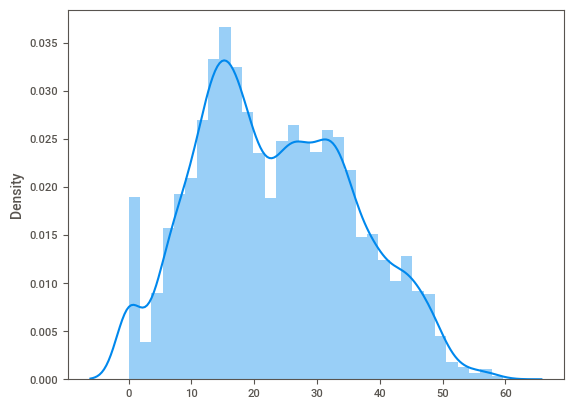

In [66]:
# Let's plot distplot inorder to see how our data distrubuted
sns.distplot(x=data['sqr_Rented_Bike_Count'])

In [67]:
# Let's see some random rows with help of sample function
data.sample(10)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
5980 2018-07-08          14.177447     4         27.3        68    0.836660   
4450 2018-04-06          31.144823    10         25.1        40    1.643168   
1517 2018-02-02           6.928203     5         -6.8        61    0.447214   
2981 2018-04-04           4.358899     5         11.9        97    1.843909   
2520 2018-03-16          16.941074     0          8.4        86    1.483240   
4805 2018-06-19          17.804494     5         19.4        77    0.894427   
3468 2018-04-24          30.413813    12         15.2        57    1.378405   
3724 2018-05-05          15.874508     4         12.1        51    1.264911   
5708 2018-07-26          42.308392    20         31.0        68    1.183216   
6457 2018-08-27           7.810250     1         20.5        89    0.707107   

      Visibility  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
5980        2000         0.000000  0.000000       0.0  Summer  No Holiday   
4450        1076         1.539480  0.000000       0.0  Summer  No Holiday   
1517        1724         0.000000  0.000000       0.0  Winter  No Holiday   
2981         305         0.000000  1.732051       0.0  Spring  No Holiday   
2520        2000         0.000000  0.000000       0.0  Spring  No Holiday   
4805         831         0.000000  0.000000       0.0  Summer  No Holiday   
3468        2000         1.153256  0.000000       0.0  Spring  No Holiday   
3724        1939         0.000000  0.000000       0.0  Spring  No Holiday   
5708        1162         0.223607  0.000000       0.0  Summer  No Holiday   
6457         235         0.000000  1.224745       0.0  Summer  No Holiday   

     Functioning_Day  date_year  date_months   date_day  weekdays_weekend  \
5980             Yes       2018            7     Sunday                 0   
4450             Yes       2018            4     Friday                 1   
1517             Yes       2018            2     Friday                 1   
2981             Yes       2018            4  Wednesday                 1   
2520             Yes       2018            3     Friday                 1   
4805             Yes       2018            6    Tuesday                 1   
3468             Yes       2018            4    Tuesday                 1   
3724             Yes       2018            5   Saturday                 0   
5708             Yes       2018            7   Thursday                 1   
6457             Yes       2018            8     Monday                 1   

     Temperature_Bins  sqr_Rented_Bike_Count  Transformed_Visibility  
5980         (20, 30]              14.177447            35578.782659  
4450         (20, 30]              31.144823            14714.415338  
1517         (-10, 0]               6.928203            28795.231189  
2981         (10, 20]               4.358899             2447.656176  
2520          (0, 10]              16.941074            35578.782659  
4805         (10, 20]              17.804494            10185.317710  
3468         (10, 20]              30.413813            35578.782659  
3724         (10, 20]              15.874508            34042.994384  
5708         (30, 40]              42.308392            16417.124251  
6457         (20, 30]               7.810250             1690.104043

In [68]:
# Let's see data for no functioning day by applying filter feature
data[data['Functioning_Day']=='No'].head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
3144 2018-11-04                0.0     0         14.4        82    2.144761   
3145 2018-11-04                0.0     1         13.6        81    1.897367   
3146 2018-11-04                0.0     2         12.7        80    1.974842   
3147 2018-11-04                0.0     3         11.6        81    1.760682   
3148 2018-11-04                0.0     4         10.2        83    1.870829   

      Visibility  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
3144        1041              0.0       0.0       0.0  Spring  No Holiday   
3145         886              0.0       0.0       0.0  Spring  No Holiday   
3146         885              0.0       0.0       0.0  Spring  No Holiday   
3147         687              0.0       0.0       0.0  Spring  No Holiday   
3148         554              0.0       0.0       0.0  Spring  No Holiday   

     Functioning_Day  date_year  date_months date_day  weekdays_weekend  \
3144              No       2018           11   Sunday                 0   
3145              No       2018           11   Sunday                 0   
3146              No       2018           11   Sunday                 0   
3147              No       2018           11   Sunday                 0   
3148              No       2018           11   Sunday                 0   

     Temperature_Bins  sqr_Rented_Bike_Count  Transformed_Visibility  
3144         (10, 20]                    0.0            14037.591611  
3145         (10, 20]                    0.0            11158.336361  
3146         (10, 20]                    0.0            11140.410135  
3147         (10, 20]                    0.0             7768.420880  
3148         (10, 20]                    0.0             5719.390017

In [69]:
# Let's see the value's distributin by categories wise
data['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [70]:
# Let's explore our data again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8760 non-null   datetime64[ns]
 1   Rented_Bike_Count       8760 non-null   float64       
 2   Hour                    8760 non-null   int64         
 3   Temperature             8760 non-null   float64       
 4   Humidity                8760 non-null   int64         
 5   Wind_speed              8760 non-null   float64       
 6   Visibility              8760 non-null   int64         
 7   Solar_Radiation         8760 non-null   float64       
 8   Rainfall                8760 non-null   float64       
 9   Snowfall                8760 non-null   float64       
 10  Seasons                 8760 non-null   object        
 11  Holiday                 8760 non-null   object        
 12  Functioning_Day         8760 non-null   object  

In [71]:
# Let's drop unwanted feature which is not useful for modeling.
data.drop(['Date','Rented_Bike_Count','Visibility','Temperature_Bins'],axis=1 , inplace=True)

In [72]:
# Let's generate a descriptive summary of the dataset using the describe() function
data.describe().T

count          mean           std          min  \
Hour                    8760.0     11.500000      6.922582     0.000000   
Temperature             8760.0     12.882922     11.944825   -17.800000   
Humidity                8760.0     58.226256     20.362413     0.000000   
Wind_speed              8760.0      1.249599      0.404264     0.000000   
Solar_Radiation         8760.0      0.478866      0.582955     0.000000   
Rainfall                8760.0      0.077869      0.377677     0.000000   
Snowfall                8760.0      0.056576      0.268097     0.000000   
date_year               8760.0   2017.915068      0.278796  2017.000000   
date_months             8760.0      6.526027      3.448048     1.000000   
weekdays_weekend        8760.0      0.709589      0.453978     0.000000   
sqr_Rented_Bike_Count   8760.0     23.443395     12.450984     0.000000   
Transformed_Visibility  8760.0  23541.819634  12305.745093    80.332216   

                                 25%           50%           75%           max  
Hour                        5.750000     11.500000     17.250000     23.000000  
Temperature                 3.500000     13.700000     22.500000     39.400000  
Humidity                   42.000000     57.000000     74.000000     98.000000  
Wind_speed                  0.948683      1.224745      1.516575      2.720294  
Solar_Radiation             0.000000      0.100000      0.964365      1.876166  
Rainfall                    0.000000      0.000000      0.000000      5.916080  
Snowfall                    0.000000      0.000000      0.000000      2.966479  
date_year                2018.000000   2018.000000   2018.000000   2018.000000  
date_months                 4.000000      7.000000     10.000000     12.000000  
weekdays_weekend            0.000000      1.000000      1.000000      1.000000  
sqr_Rented_Bike_Count      13.820275     22.461075     32.638167     59.632206  
Transformed_Visibility  12138.975252  28178.626021  35578.782659  35578.782659

# ***Modeling start***

In [73]:
# Let's Assign all catagoriacla features to a variable
categorical_features=list(data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day', 'date_day'], dtype='object')

In [74]:
# Let's check the how the value are distributed.
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [75]:
# Let's check the first 5 rows of our dataset
data.head()

Hour  Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  \
0     0         -5.2        37    1.483240              0.0       0.0   
1     1         -5.5        38    0.894427              0.0       0.0   
2     2         -6.0        39    1.000000              0.0       0.0   
3     3         -6.2        40    0.948683              0.0       0.0   
4     4         -6.0        36    1.516575              0.0       0.0   

   Snowfall Seasons     Holiday Functioning_Day  date_year  date_months  \
0       0.0  Winter  No Holiday             Yes       2017            1   
1       0.0  Winter  No Holiday             Yes       2017            1   
2       0.0  Winter  No Holiday             Yes       2017            1   
3       0.0  Winter  No Holiday             Yes       2017            1   
4       0.0  Winter  No Holiday             Yes       2017            1   

   date_day  weekdays_weekend  sqr_Rented_Bike_Count  Transformed_Visibility  
0  Thursday                 1              15.937377            35578.782659  
1  Thursday                 1              14.282857            35578.782659  
2  Thursday                 1              13.152946            35578.782659  
3  Thursday                 1              10.344080            35578.782659  
4  Thursday                 1               8.831761            35578.782659

In [76]:
# Let's apply one-hot encoding on categorical features
data = pd.get_dummies(data, columns=['Seasons', 'Holiday', 'Functioning_Day','date_day'])



In [77]:
# Let's see statstical aspect about our data
data.describe().T

count          mean           std          min  \
Hour                    8760.0     11.500000      6.922582     0.000000   
Temperature             8760.0     12.882922     11.944825   -17.800000   
Humidity                8760.0     58.226256     20.362413     0.000000   
Wind_speed              8760.0      1.249599      0.404264     0.000000   
Solar_Radiation         8760.0      0.478866      0.582955     0.000000   
Rainfall                8760.0      0.077869      0.377677     0.000000   
Snowfall                8760.0      0.056576      0.268097     0.000000   
date_year               8760.0   2017.915068      0.278796  2017.000000   
date_months             8760.0      6.526027      3.448048     1.000000   
weekdays_weekend        8760.0      0.709589      0.453978     0.000000   
sqr_Rented_Bike_Count   8760.0     23.443395     12.450984     0.000000   
Transformed_Visibility  8760.0  23541.819634  12305.745093    80.332216   
Seasons_Autumn          8760.0      0.249315      0.432641     0.000000   
Seasons_Spring          8760.0      0.252055      0.434217     0.000000   
Seasons_Summer          8760.0      0.252055      0.434217     0.000000   
Seasons_Winter          8760.0      0.246575      0.431042     0.000000   
Holiday_Holiday         8760.0      0.049315      0.216537     0.000000   
Holiday_No Holiday      8760.0      0.950685      0.216537     0.000000   
Functioning_Day_No      8760.0      0.033676      0.180404     0.000000   
Functioning_Day_Yes     8760.0      0.966324      0.180404     0.000000   
date_day_Friday         8760.0      0.139726      0.346722     0.000000   
date_day_Monday         8760.0      0.136986      0.343853     0.000000   
date_day_Saturday       8760.0      0.142466      0.349547     0.000000   
date_day_Sunday         8760.0      0.147945      0.355066     0.000000   
date_day_Thursday       8760.0      0.142466      0.349547     0.000000   
date_day_Tuesday        8760.0      0.145205      0.352328     0.000000   
date_day_Wednesday      8760.0      0.145205      0.352328     0.000000   

                                 25%           50%           75%           max  
Hour                        5.750000     11.500000     17.250000     23.000000  
Temperature                 3.500000     13.700000     22.500000     39.400000  
Humidity                   42.000000     57.000000     74.000000     98.000000  
Wind_speed                  0.948683      1.224745      1.516575      2.720294  
Solar_Radiation             0.000000      0.100000      0.964365      1.876166  
Rainfall                    0.000000      0.000000      0.000000      5.916080  
Snowfall                    0.000000      0.000000      0.000000      2.966479  
date_year                2018.000000   2018.000000   2018.000000   2018.000000  
date_months                 4.000000      7.000000     10.000000     12.000000  
weekdays_weekend            0.000000      1.000000      1.000000      1.000000  
sqr_Rented_Bike_Count      13.820275     22.461075     32.638167     59.632206  
Transformed_Visibility  12138.975252  28178.626021  35578.782659  35578.782659  
Seasons_Autumn              0.000000      0.000000      0.000000      1.000000  
Seasons_Spring              0.000000      0.000000      1.000000      1.000000  
Seasons_Summer              0.000000      0.000000      1.000000      1.000000  
Seasons_Winter              0.000000      0.000000      0.000000      1.000000  
Holiday_Holiday             0.000000      0.000000      0.000000      1.000000  
Holiday_No Holiday          1.000000      1.000000      1.000000      1.000000  
Functioning_Day_No          0.000000      0.000000      0.000000      1.000000  
Functioning_Day_Yes         1.000000      1.000000      1.000000      1.000000  
date_day_Friday             0.000000      0.000000      0.000000      1.000000  
date_day_Monday             0.000000      0.000000      0.000000      1.000000  
date_day_Saturday           0.000000      0.000000      0.000

# **LINEAR REGRESSION**



In [78]:
# Let's Split the data into training and testing datasets

X = data.drop('sqr_Rented_Bike_Count', axis=1)  # Replace 'target_variable' with the name of your target column
y = data['sqr_Rented_Bike_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the machine learning model
model = LinearRegression()  # Replace with your desired algorithm
model.fit(X_train, y_train)

# Make predictions on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy scores
train_accuracy_m = mean_squared_error(y_train, train_predictions)
test_accuracy_m = mean_squared_error(y_test, test_predictions)

# Calculate accuracy scores
train_accuracy_r = r2_score(y_train, train_predictions)
test_accuracy_r = r2_score(y_test, test_predictions)

print("Training Accuracy mean squared error:", train_accuracy_m)
print("Testing Accuracy mean squared error:", test_accuracy_m)

print("Training Accuracy r2 score :", train_accuracy_r)
print("Testing Accuracy r2 score :", test_accuracy_r)

Training Accuracy mean squared error: 49.66326244866858
Testing Accuracy mean squared error: 51.92556543649547
Training Accuracy r2 score : 0.6801746800598939
Testing Accuracy r2 score : 0.6626382819734625


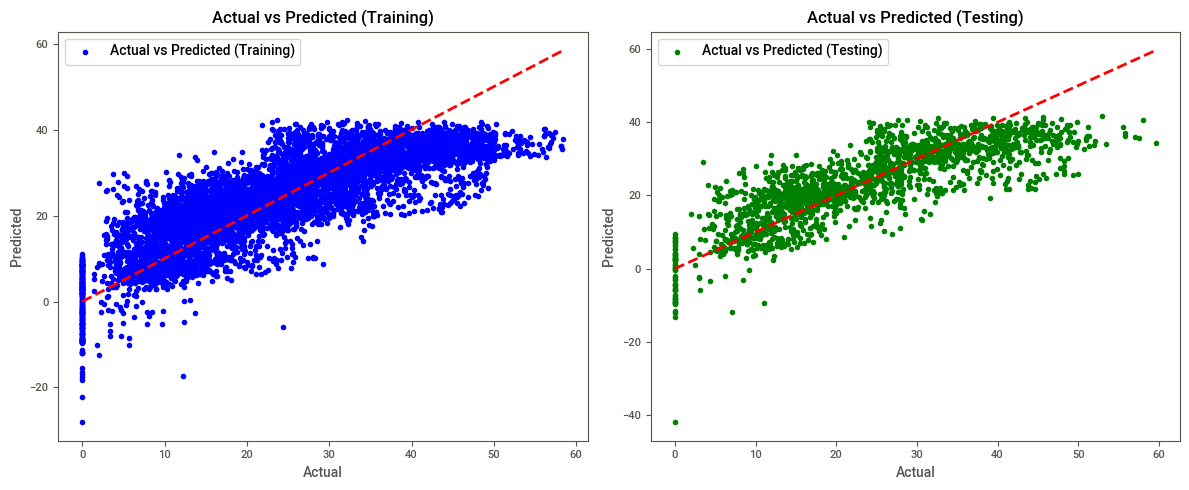

In [79]:
# Let's Create a figure with two subplots

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the actual values vs predicted values for training data
axs[0].scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted (Training)')
axs[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs Predicted (Training)')
axs[0].legend()

# Plotting the actual values vs predicted values for testing data
axs[1].scatter(y_test, test_predictions, color='green', label='Actual vs Predicted (Testing)')
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Actual vs Predicted (Testing)')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots side by side
plt.show()


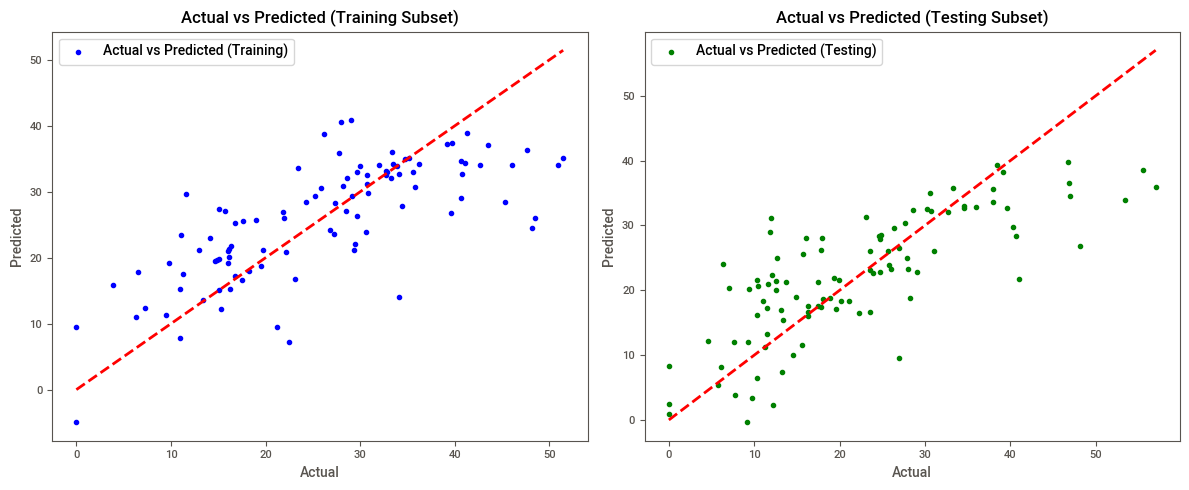

In [80]:
# Let's Convert y_train and y_test to Pandas Series if they are NumPy arrays

if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

# Select a subset of data
subset_size = 100  # Specify the desired subset size
random_indices = np.random.choice(range(len(y_train)), size=subset_size, replace=False)
y_train_subset = y_train.iloc[random_indices]
train_predictions_subset = train_predictions[random_indices]

random_indices = np.random.choice(range(len(y_test)), size=subset_size, replace=False)
y_test_subset = y_test.iloc[random_indices]
test_predictions_subset = test_predictions[random_indices]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the actual values vs predicted values for training data subset
axs[0].scatter(y_train_subset, train_predictions_subset, color='blue', label='Actual vs Predicted (Training)')
axs[0].plot([min(y_train_subset), max(y_train_subset)], [min(y_train_subset), max(y_train_subset)], color='red', linestyle='--', linewidth=2)
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs Predicted (Training Subset)')
axs[0].legend()

# Plotting the actual values vs predicted values for testing data subset
axs[1].scatter(y_test_subset, test_predictions_subset, color='green', label='Actual vs Predicted (Testing)')
axs[1].plot([min(y_test_subset), max(y_test_subset)], [min(y_test_subset), max(y_test_subset)], color='red', linestyle='--', linewidth=2)
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Actual vs Predicted (Testing Subset)')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots side by side
plt.show()


In [81]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [82]:
#check the score
reg.score(X_train, y_train)

0.6801746800598939

In [83]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [84]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 49.66326244866858
RMSE : 7.047216645503995
MAE : 5.4417819892593995
R2 : 0.6801746800598939
Adjusted R2 : 0.6753541245129706


In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [86]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 51.92556543649547
RMSE : 7.205939594285777
MAE : 5.499517437052552
R2 : 0.6626382819734625
Adjusted R2 : 0.6575534097017582


**The r2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [87]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

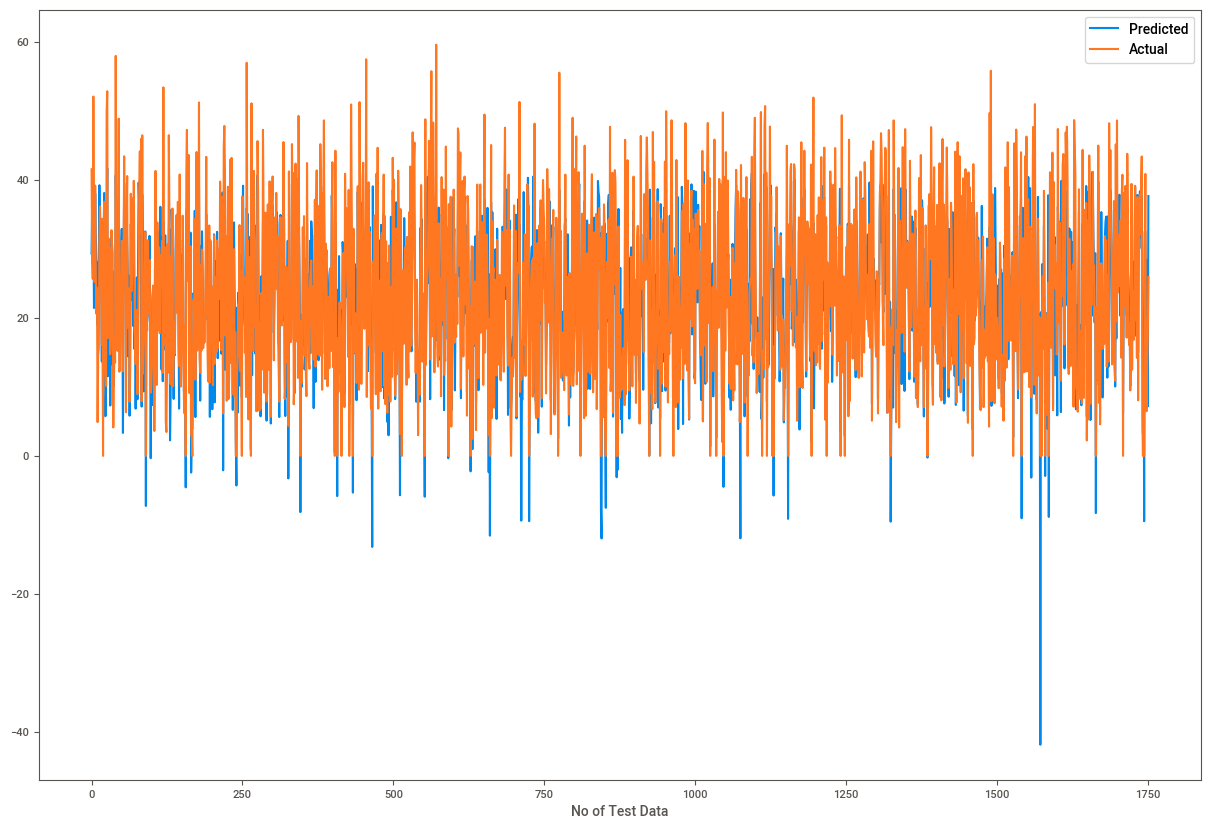

In [88]:
# Let's Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [89]:
X.head()

Hour  Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  \
0     0         -5.2        37    1.483240              0.0       0.0   
1     1         -5.5        38    0.894427              0.0       0.0   
2     2         -6.0        39    1.000000              0.0       0.0   
3     3         -6.2        40    0.948683              0.0       0.0   
4     4         -6.0        36    1.516575              0.0       0.0   

   Snowfall  date_year  date_months  weekdays_weekend  ...  \
0       0.0       2017            1                 1  ...   
1       0.0       2017            1                 1  ...   
2       0.0       2017            1                 1  ...   
3       0.0       2017            1                 1  ...   
4       0.0       2017            1                 1  ...   

   Holiday_No Holiday  Functioning_Day_No  Functioning_Day_Yes  \
0                   1                   0                    1   
1                   1                   0                    1   
2                   1                   0                    1   
3                   1                   0                    1   
4                   1                   0                    1   

   date_day_Friday  date_day_Monday  date_day_Saturday  date_day_Sunday  \
0                0                0                  0                0   
1                0                0                  0                0   
2                0                0                  0                0   
3                0                0                  0                0   
4                0                0                  0                0   

   date_day_Thursday  date_day_Tuesday  date_day_Wednesday  
0                  1                 0                   0  
1                  1                 0                   0  
2                  1                 0                   0  
3                  1                 0                   0  
4                  1                 0                   0  

[5 rows x 26 columns]

In [90]:

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Use the original target variable for y_actual
y_actual = y


In [91]:
residuals = y_actual - y_pred


In [92]:
# Let's find mean of our residuals
mean_residuals = np.mean(residuals)
mean_residuals

8.835647586487514e-13

#**LASSO REGRESSION**

In [93]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso model
lasso = Lasso(alpha=0.01)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6940893564274846 0.6704880004568929


In [94]:
data.sample(5)

Hour  Temperature  Humidity  Wind_speed  Solar_Radiation  Rainfall  \
7720    16         18.5        40    1.341641         1.131371       0.0   
3339     3          8.6        53    1.224745         0.000000       0.0   
5715     3         27.6        80    1.264911         0.000000       0.0   
3743    23         19.1        62    1.897367         0.000000       0.0   
3848     8         13.5        63    1.483240         1.004988       0.0   

      Snowfall  date_year  date_months  weekdays_weekend  ...  \
7720       0.0       2018           10                 1  ...   
3339       0.0       2018            4                 1  ...   
5715       0.0       2018            7                 1  ...   
3743       0.0       2018            5                 0  ...   
3848       0.0       2018           10                 1  ...   

      Holiday_No Holiday  Functioning_Day_No  Functioning_Day_Yes  \
7720                   1                   0                    1   
3339                   1                   0                    1   
5715                   1                   0                    1   
3743                   1                   0                    1   
3848                   1                   1                    0   

      date_day_Friday  date_day_Monday  date_day_Saturday  date_day_Sunday  \
7720                0                0                  0                0   
3339                0                0                  0                0   
5715                1                0                  0                0   
3743                0                0                  1                0   
3848                1                0                  0                0   

      date_day_Thursday  date_day_Tuesday  date_day_Wednesday  
7720                  1                 0                   0  
3339                  1                 0                   0  
5715                  0                 0                   0  
3743                  0                 0                   0  
3848                  0                 0                   0  

[5 rows x 27 columns]

In [95]:
X_test.size

56940

In [96]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [97]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 50.61526443563003
RMSE : 7.114440556757083
MAE : 5.480549545366898
R2 : 0.6704880004568929
Adjusted R2 : 0.6665271534905866


**Looks like our r2 score value is 0.67 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [98]:
training_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
1  Linear regression   5.442  49.663  7.047      0.68         0.68

In [99]:
# storing the test set metrics value in a dataframe for later comparison

dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [100]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 48.70597370648799
RMSE : 6.978966521376069
MAE : 5.383005482773442
R2 : 0.6940893564274846
Adjusted R2 : 0.69041220583438


In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [102]:
print("y_test shape:", y_test.shape)
print("y_pred_test_lasso shape:", y_pred_test_lasso.shape)


y_test shape: (2190,)
y_pred_test_lasso shape: (2190,)


In [103]:
y_pred_test_lasso = y_pred_test_lasso[:1752]


In [104]:
y_test.size

2190

In [105]:
y_pred_test_lasso.size

1752

# **RIDGE REGRESSION**


In [106]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [107]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [108]:
#check the score
ridge.score(X_train, y_train)

0.6705001419205796

In [109]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [110]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 50.61339942495976
RMSE : 7.114309483355343
MAE : 5.48122722211883
R2 : 0.6705001419205796
Adjusted R2 : 0.6665394408988206


**Looks like our r2 score value is 0.68 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [112]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 48.69902466350321
RMSE : 6.97846864745434
MAE : 5.383157953983429
R2 : 0.6941330017147034
Adjusted R2 : 0.690456375752883


**The r2_score for the test set is 0.66. This means our linear model is  performing not very well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [113]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

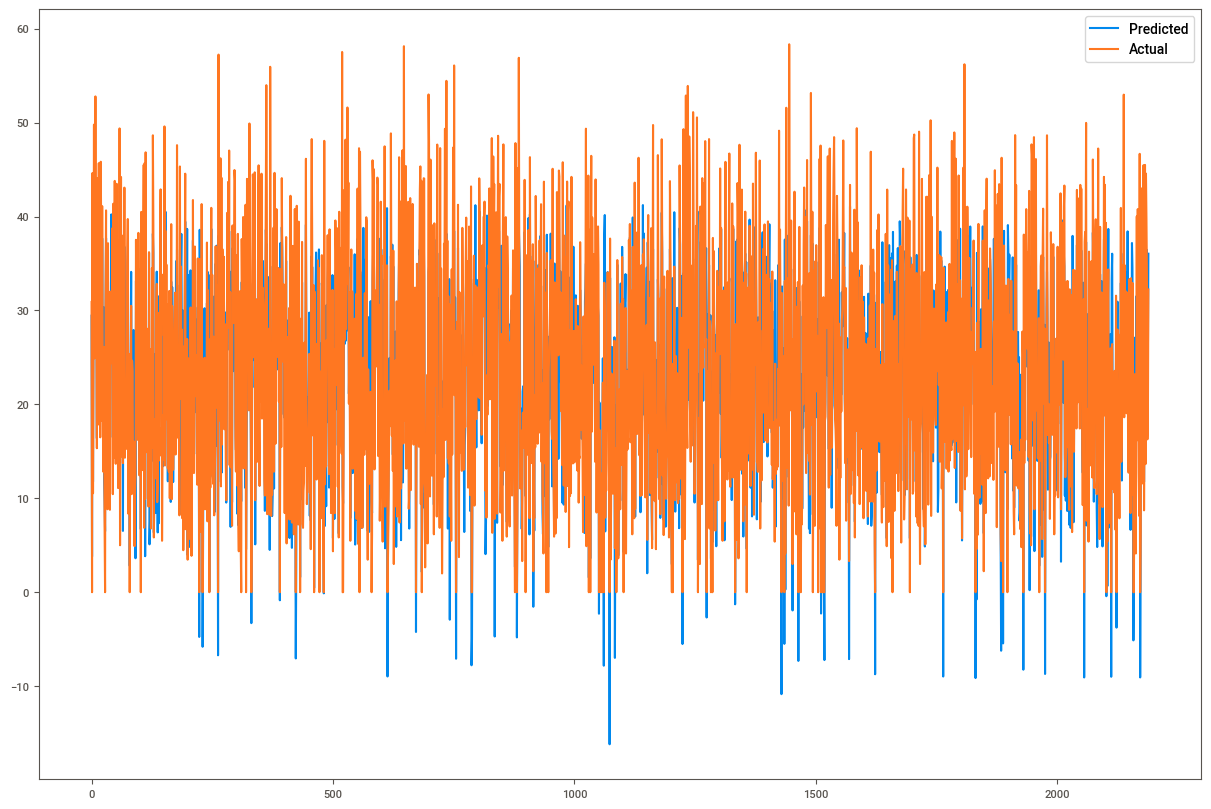

In [114]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [115]:


# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.6626421925509224


In [116]:
training_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   5.442  49.663  7.047     0.680         0.68
1   Lasso regression   5.481  50.615  7.114     0.670         0.67
2   Ridge regression   5.481  50.613  7.114     0.671         0.67

In [117]:
test_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0  Linear regression   5.500  51.926  7.206     0.663         0.66
1   Lasso regression   5.383  48.706  6.979     0.694         0.69
2   Ridge regression   5.383  48.699  6.978     0.694         0.69

# **ELASTIC NET REGRESSION**

In [118]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [119]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [120]:
#check the score
elasticnet.score(X_train, y_train)

0.6316249044783162

In [121]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [122]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.20219103313273
RMSE : 7.5632130099008
MAE : 5.808581283499171
R2 : 0.6316249044783162
Adjusted R2 : 0.6260725841979894


**Looks like our r2 score value is 0.63 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [123]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [124]:
# Let's calculates and prints various evaluation metrics for a regression model.

# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.80941713763397
RMSE : 7.603250432389688
MAE : 5.792848584161065
R2 : 0.6244107479673655
Adjusted R2 : 0.6187496925744098


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


change it

In [125]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

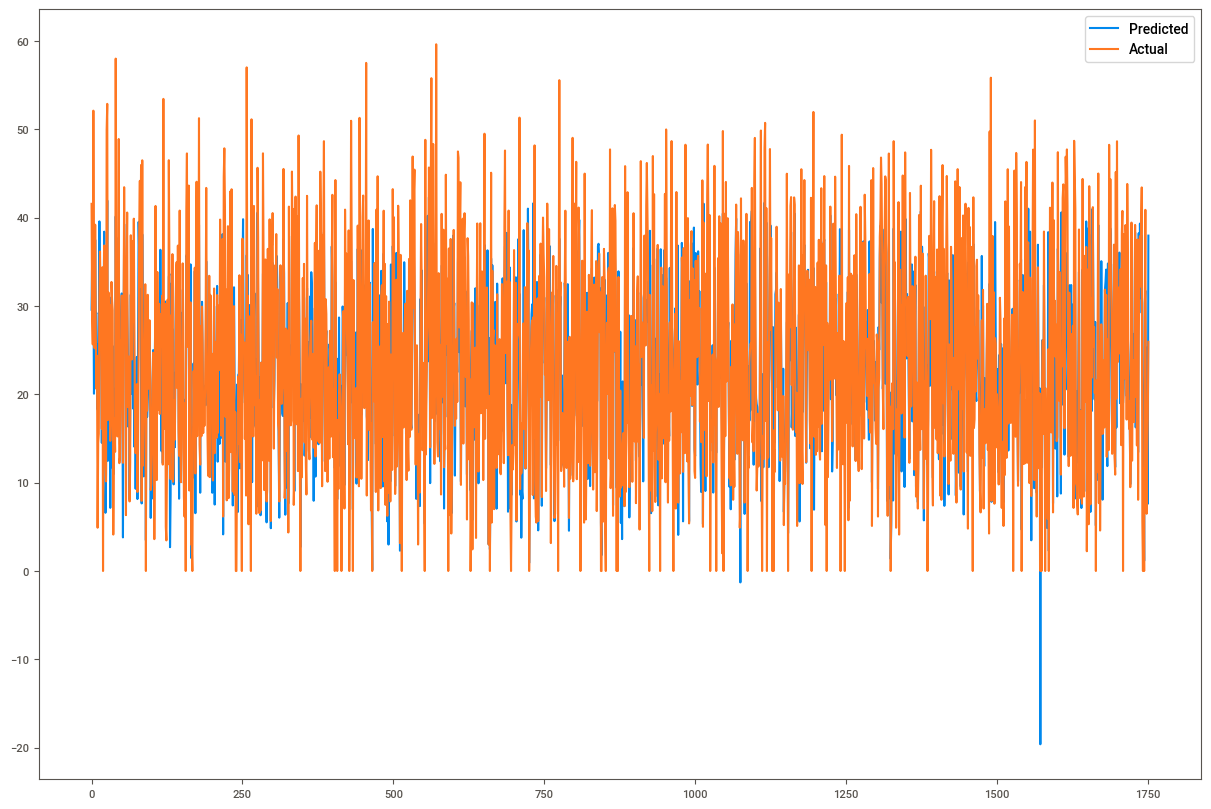

In [126]:
# Let's Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

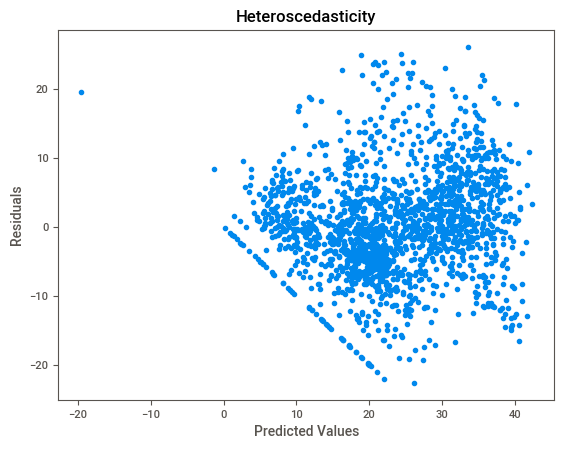

In [127]:
# Let's create a scatter plot of predicted values versus residuals in order to assess heteroscedasticity.

residuals = (y_test) - (y_pred_test_en)
plt.scatter(y_pred_test_en, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity')
plt.show()


# **RANDOM FOREST**

In [128]:

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [129]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [130]:
# Let's calculates and prints various evaluation metrics for a regression model.

print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9893843198245612
MSE : 1.648428932151695
RMSE : 1.2839115748959096
MAE : 0.8324796034724677
R2 : 0.9893843198245612
Adjusted R2 : 0.989224315369743


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [131]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [132]:
# Let's calculates and prints various evaluation metrics for a regression model.

# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.518934533973862
RMSE : 3.393955588096854
MAE : 2.219206007952596
R2 : 0.9251611896461823
Adjusted R2 : 0.9240331843886755


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [133]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

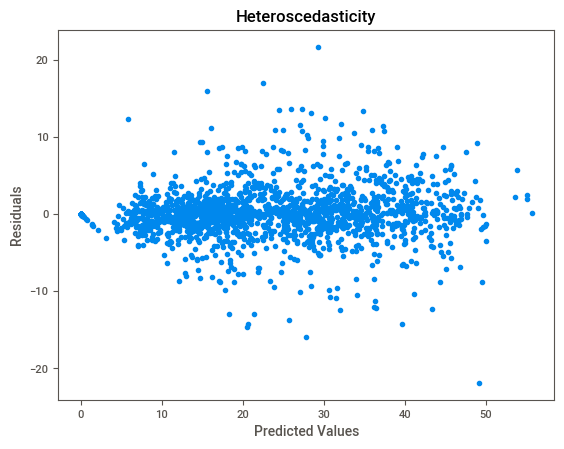

In [134]:
# Let's plot scatter plot to see heteroscedasticity.

residuals = (y_test) - (y_pred_test_r)
plt.scatter(y_pred_test_r, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity')
plt.show()


In [135]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [136]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [137]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [138]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [139]:
import plotly.graph_objects as go

# Define the figure layout
fig = go.Figure()

# Create the horizontal bar chart
fig.add_trace(go.Bar(
    y=[features[i] for i in indices],
    x=importances[indices],
    orientation='h',
    marker=dict(color="rgb(128, 0, 0)")
))

# Set the title and axis labels
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Relative Importance',
    yaxis_title=None
)

# Show the figure
fig.show()


# **GRADIENT BOOSTING**

In [140]:

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [141]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [142]:
# Let's calculates and prints various evaluation metrics for a regression model.

print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.891579844500173
MSE : 16.83574845894542
RMSE : 4.103138854455869
MAE : 2.9623891410585146
R2 : 0.891579844500173
Adjusted R2 : 0.8899456856346684


**Looks like our r2 score value is 0.89 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [143]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [144]:
# Let's calculates and prints various evaluation metrics for a regression model.

#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 19.32403500064401
RMSE : 4.395911168420492
MAE : 3.130909262993978
R2 : 0.8744512535930857
Adjusted R2 : 0.8725589246617351


**The r2_score for the test set is 0.87. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [145]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

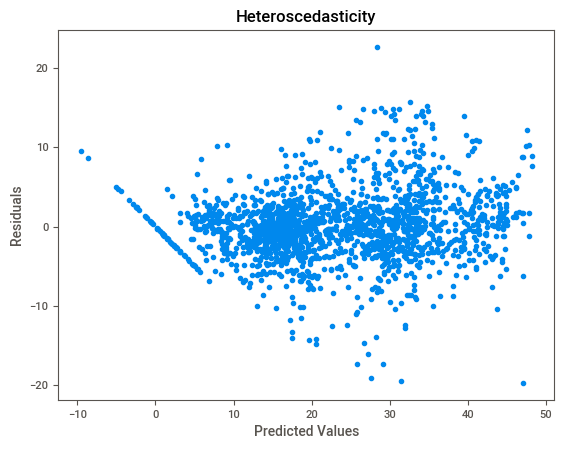

In [146]:
residuals = (y_test) - (y_pred_test_g)
plt.scatter(y_pred_test_g, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Heteroscedasticity')
plt.show()


In [147]:
gb_model.feature_importances_

array([2.52080935e-01, 3.04281808e-01, 9.52367771e-02, 6.54350713e-04,
       3.27610889e-02, 6.22409752e-02, 4.16853437e-04, 8.83364842e-04,
       2.05123713e-03, 1.76127041e-03, 1.09064116e-03, 1.76722396e-02,
       2.90108352e-04, 7.75092615e-04, 4.30480545e-02, 1.36917497e-03,
       8.76339442e-04, 6.57472054e-02, 1.15400638e-01, 5.58817710e-05,
       0.00000000e+00, 4.45129462e-05, 1.10346436e-03, 3.85523676e-05,
       1.06063001e-04, 1.33706502e-05])

In [148]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [149]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [150]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1              Temperature                0.30
0                     Hour                0.25
18     Functioning_Day_Yes                0.12
2                 Humidity                0.10
17      Functioning_Day_No                0.07
5                 Rainfall                0.06
14          Seasons_Winter                0.04
4          Solar_Radiation                0.03
11          Seasons_Autumn                0.02
16      Holiday_No Holiday                0.00
24        date_day_Tuesday                0.00
23       date_day_Thursday                0.00
22         date_day_Sunday                0.00
21       date_day_Saturday                0.00
20         date_day_Monday                0.00
19         date_day_Friday                0.00
13          Seasons_Summer                0.00
15         Holiday_Holiday                0.00
12          Seasons_Spring                0.00
10  Transformed_Visibility                0.00
9         weekdays_weekend                0.00
8              date_months                0.00
7                date_year                0.00
6                 Snowfall                0.00
3               Wind_speed                0.00
25      date_day_Wednesday                0.00

In [151]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [152]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

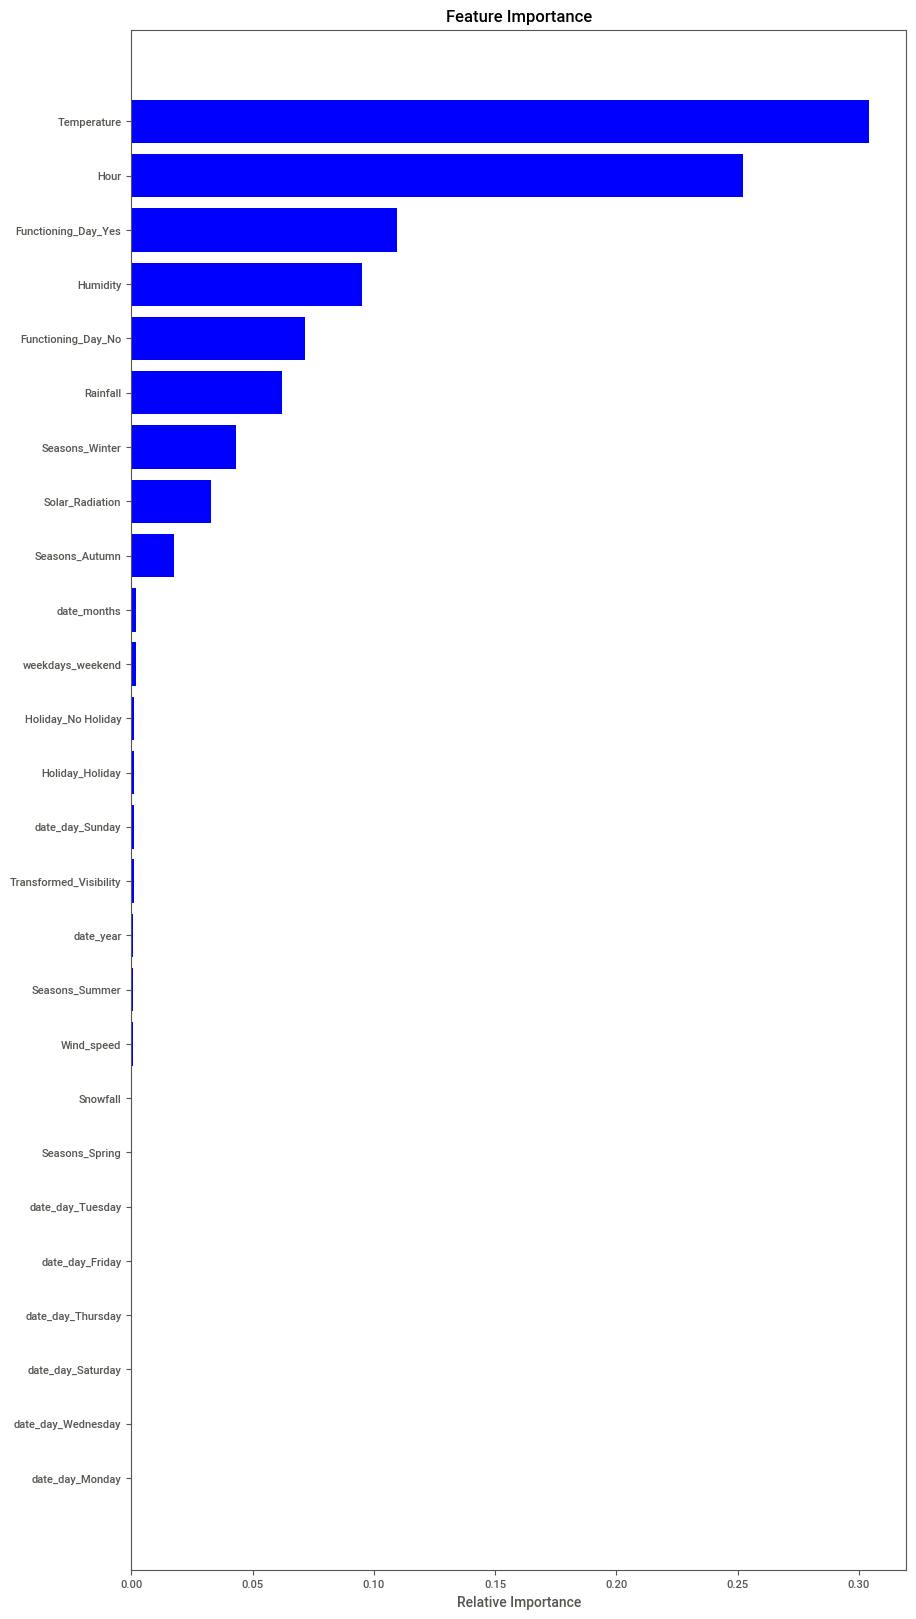

In [153]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

In [154]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

### **Importing Gradient Boosting Regressor**

In [155]:
# Instantiate the Random Forest regressor with the given hyperparameters
rf_regressor = RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100)

# Train the regressor using your training data
rf_regressor.fit(X_train, y_train)

# Make predictions on new data
predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error:", mse)


Mean Squared Error: 23.677642688922322


In [156]:

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [157]:
# Let's represent the model with the optimal hyperparameter values.
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [158]:
# Let's assign the best estimator to the gb_optimal_model variable.
gb_optimal_model = gb_grid.best_estimator_

In [159]:
# Let's retrieve the best parameters found during the grid search optimization process
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [160]:
# Let's Make predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [161]:
# Let's store the test set metrics value in a dataframe for later comparison

print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9582692835554902
MSE : 6.48004830681565
RMSE : 2.545593900608589
MAE : 1.7146422618162358
R2 : 0.9582692835554902
Adjusted R2 : 0.9576402988438628


In [162]:
# Let's store the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [163]:
# Let's calculates and prints various evaluation metrics for a regression model.

MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 11.333678515321791
RMSE : 3.3665529128949974
MAE : 2.2133815278725764
R2 : 0.9263648027065668
Adjusted R2 : 0.9252549388633036


In [164]:
# storing the test set metrics value in a dataframe for later comparison.

dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

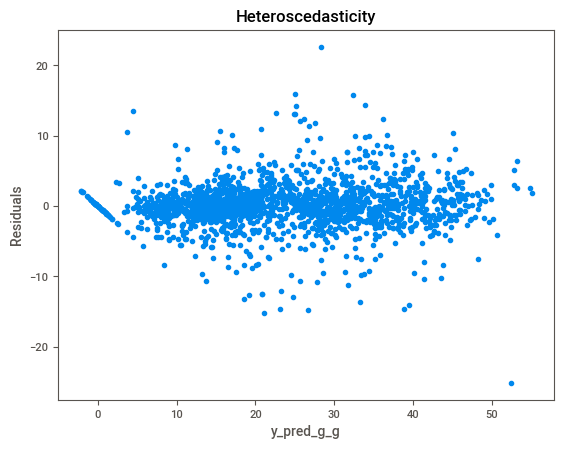

In [165]:
# Let's plot Scatter plot in order to see heteroscedasticity

# Scatter plot
plt.scatter(y_pred_g_g, y_test - y_pred_g_g)

# Title and labels
plt.title("Heteroscedasticity")
plt.xlabel("y_pred_g_g")
plt.ylabel("Residuals")

# Show the modified scatter plot
plt.show()


In [166]:
# Let's featch the important features arry
gb_optimal_model.feature_importances_

array([0.25125456, 0.28608203, 0.0844375 , 0.00419717, 0.05189732,
       0.0705449 , 0.00073025, 0.00123435, 0.01025198, 0.01098739,
       0.00563211, 0.00809006, 0.00276407, 0.00111189, 0.04588344,
       0.00100971, 0.0012196 , 0.09882634, 0.05812438, 0.00046064,
       0.00101074, 0.00124213, 0.00154142, 0.00030475, 0.00060069,
       0.00056058])

In [167]:
# Let's store the feature importances from your gradient boosting model.

importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [168]:
# Let's round the values in the 'Feature Importance' column to two decimal places.

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [169]:
# Let's sort the Importance features using sort_values function.

importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1              Temperature                0.29
0                     Hour                0.25
17      Functioning_Day_No                0.10
2                 Humidity                0.08
5                 Rainfall                0.07
18     Functioning_Day_Yes                0.06
4          Solar_Radiation                0.05
14          Seasons_Winter                0.05
8              date_months                0.01
10  Transformed_Visibility                0.01
11          Seasons_Autumn                0.01
9         weekdays_weekend                0.01
24        date_day_Tuesday                0.00
23       date_day_Thursday                0.00
22         date_day_Sunday                0.00
21       date_day_Saturday                0.00
20         date_day_Monday                0.00
19         date_day_Friday                0.00
13          Seasons_Summer                0.00
16      Holiday_No Holiday                0.00
15         Holiday_Holiday                0.00
12          Seasons_Spring                0.00
7                date_year                0.00
6                 Snowfall                0.00
3               Wind_speed                0.00
25      date_day_Wednesday                0.00

In [170]:
# Let's fit the model on traing dataset.
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [171]:
# Let's determine the feature importances with help of gradient boosting model.

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

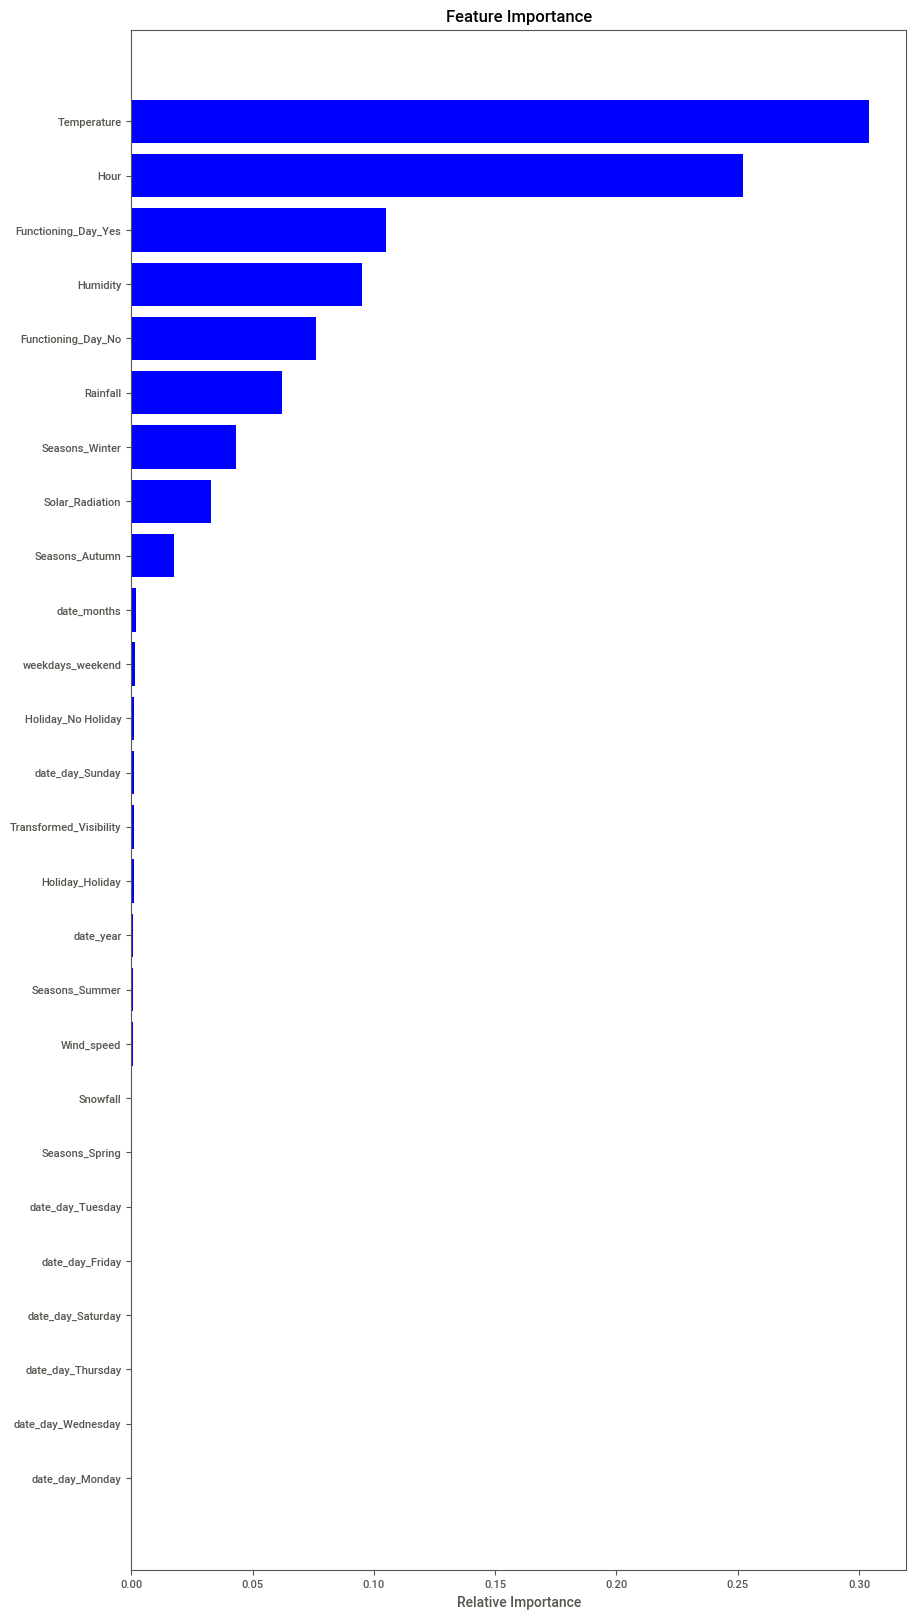

In [172]:
# Let's Plot the bar chart in order to see the feature importance.
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [173]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   5.442  49.663  7.047   
             1                Lasso regression   5.481  50.615  7.114   
             2                Ridge regression   5.481  50.613  7.114   
             3          Elastic net regression   5.809  57.202  7.563   
             4        Random forest regression   0.832   1.648  1.284   
             5    Gradient boosting regression   2.962  16.836  4.103   
             6  Gradient Boosting gridsearchcv   1.715   6.480  2.546   
Test set     0               Linear regression   5.500  51.926  7.206   
             1                Lasso regression   5.383  48.706  6.979   
             2                Ridge regression   5.383  48.699  6.978   
             3      Elastic net regression Test  5.793  57.809  7.603   
             4        Random forest regression   2.219  11.519  3.394   
             5    Gradient boosting regression   3.131  19.324  4.396   
             6  Gradient Boosting gridsearchcv   2.213  11.334  3.367   

                R2_score  Adjusted R2  
Training set 0     0.680         0.68  
             1     0.670         0.67  
             2     0.671         0.67  
             3     0.632         0.63  
             4     0.989         0.99  
             5     0.892         0.89  
             6     0.958         0.96  
Test set     0     0.663         0.66  
             1     0.694         0.69  
             2     0.694         0.69  
             3     0.624         0.62  
             4     0.925         0.92  
             5     0.874         0.87  
             6     0.926         0.93

In [174]:
#Installing the shap library
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


In [177]:
import xgboost as xgb

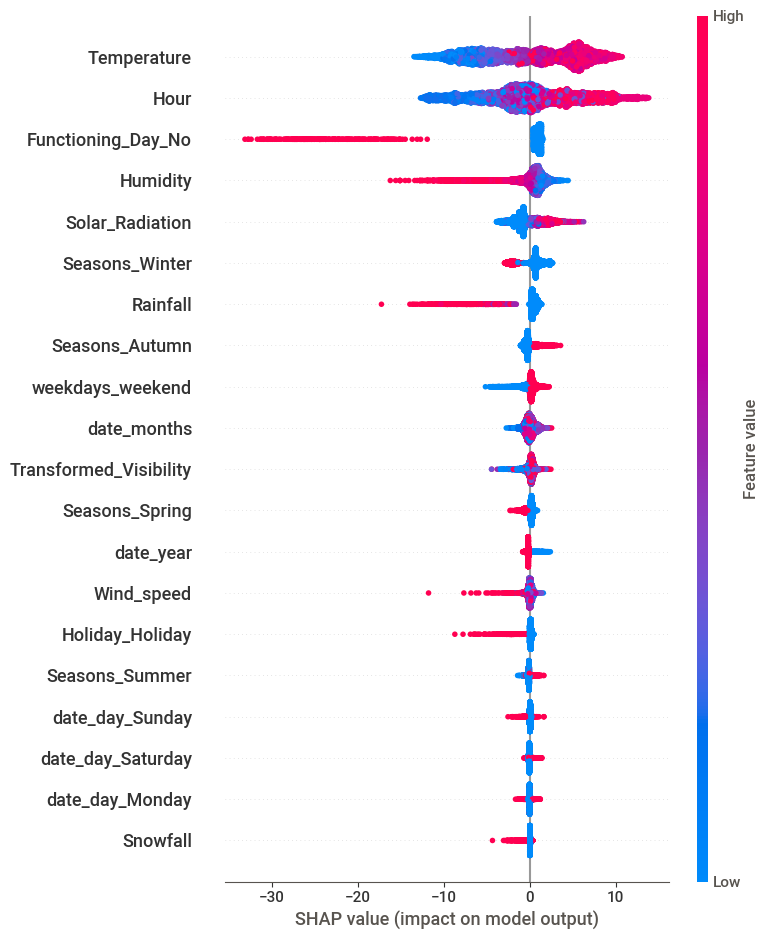

In [176]:

# Train XGBoost model
x_train = data.drop(columns=['sqr_Rented_Bike_Count'])  # Your transformed features (excluding the target variable)
y_train = data['sqr_Rented_Bike_Count']  # Your target variable
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(x_train)
# Generate the summary plot
shap.summary_plot(shap_values, x_train)
plt.show()